# EXPLORATORY (EDA) IN DATASET OF OPENGOV

## We are going to start explorating the opengov data for Ministry of Defence

In [1]:
import pandas as pd

# Read the .csv file
data_def = pd.read_csv('data/exportministryofdefencetocsv.csv')
my_cols = data_def.columns.to_list()
print(my_cols)

['16181', 'term_id', 'name', 'post_title', 'comment_content']


In [2]:
from pprint import pprint

# Set maximum width of columns columns
pd.set_option('display.max_colwidth', None)

# See an exanple of a comment
pprint(data_def[my_cols[4]][1:4])

1                                                                                                                                                                                                                                                                                                                                                             α)\tΝα προστεθεί παράγραφος 3 ως εξής :\r\n3.\tΣτις συμβάσεις που εμπίπτουν στις εξαιρέσεις του νόμου (Εφαρμογή άρθρου 346 ΣΛΕΕ, διακρατικές κλπ.) πρέπει να λαμβάνεται υπόψη η ΕΑΒΣ και να προβλέπεται η απαιτούμενη Εγχώρια Βιομηχανική Συμμετοχή (συγκεκριμένο ποσοστό επί του συνολικού τιμήματος της σύμβασης για βιομηχανικές συνεργασίες σε ευαίσθητους τομείς που μπορεί να υποστηρίξει η εγχώρια αμυντική βιομηχανία), ώστε να επιτυγχάνεται η ασφάλεια εφοδιασμού, μέσω της σύναψης συμβάσεων μεταξύ αλλοδαπών και εγχωρίων βιομηχανιών («Βιομηχανικές Συνεργασίες»), σχεδιαστικού και παραγωγικού έργου επί των υλικών της προμήθειας ή άλλων υλικών αμυντικής 

### CHECK HOW MANY DIFFERENT TERM_ID's WE HAVE

In [3]:
import numpy as np
# Unique terms for our comments

unique_terms = np.unique(data_def[my_cols[1]])
print(unique_terms)

[68 69 73 74 75 76 77 82 83]


### CHECK THE NUMBER OF COMMENTS FOR EACH DIFFERENT TERM

In [4]:
for term_id in unique_terms:
    comment_num = data_def[data_def[my_cols[1]] == term_id] 
    print(f'For term id: {term_id} the number of comments is: {len(comment_num)}')

For term id: 68 the number of comments is: 11
For term id: 69 the number of comments is: 386
For term id: 73 the number of comments is: 682
For term id: 74 the number of comments is: 891
For term id: 75 the number of comments is: 47
For term id: 76 the number of comments is: 1077
For term id: 77 the number of comments is: 318
For term id: 82 the number of comments is: 1
For term id: 83 the number of comments is: 11245


### CHECK FOR A TERM_ID HOW MANY DIFFERENT ARTICLES DO WE HAVE 

We are going to use an example term_id. Lets take term_id=74

In [5]:
# Extract term_id = 74
df_74 = data_def[data_def['term_id'] == 74]

#Print a the unique articles of the above term_id
np.unique(df_74[my_cols[3]])

array(['Άρθρο 01 - Ειδικές κατηγορίες αξιωματικών Εκτός Οργανικών Θέσεων',
       'Άρθρο 02 - Αποστρατευτικός βαθμός Εθελοντών Μακράς Θητείας',
       'Άρθρο 03 - Ανάκληση στην ενέργεια Χειριστών Ειδικής Μονιμότητας',
       'Άρθρο 04 - Τροποποίηση διατάξεων του άρθρου 27 του ν.3383/2010',
       'Άρθρο 05 - Τροποποίηση του άρθρου 16 του ν.2439/1996',
       'Άρθρο 06 - Οργανικές θέσεις Κοινού Σώματος Στρατιωτικών Ιερέων των Ενόπλων Δυνάμεων',
       'Άρθρο 12', 'Άρθρο 14 - Συγκρότηση – Υπαγωγή',
       'Άρθρο 15 - Αποστολή – Αρμοδιότητες',
       'Άρθρο 16 - Διενέργεια Οικονομικών Επιθεωρήσεων – Ελέγχων – Ερευνών',
       'Άρθρο 17 - Δομή - Οργάνωση',
       'Άρθρο 18 - Στελέχωση Σώματος Αξιωματικών Οικονομικών Επιθεωρητών - Εσωτερικών Ελεγκτών',
       'Άρθρο 19 - Νομική Υποστήριξη',
       'Άρθρο 20 - Διευθυντής Σ.Ο.Ε.Ε.ΕΛ.',
       'Άρθρο 21 - Υποδιευθυντής Σώματος',
       'Άρθρο 22 - Διευθυντές Περιφερειακών Μονάδων Οικονομικών Επιθεωρήσεων - Εσωτερικών Ελέγχων και Υπηρεσίας Εσωτ

### EXPLORATORY FOR COMMENTS WITH TERM ID *73*, *74*, *76*, *83*

We are going to explore the comments of the cases with id's **73**, **74**, **76** and **83**, and compare them in order to check the differences and similarities they may have. With the following exploratory we are going to find patterns in order to find how comments for political or bussiness discussions differ or look like. 

### PLOT THE AVERAGE WORD LENGTH WITHOUT ANY CLEANING (INCLUDING STOPWORDS)

In [6]:
def no_of_words(text):
    """
    Calculate the length of each comment text
    :param text: str of each comment
    :return: length of words of each comments
    """
    return len(str(text).split())

# Apply the function to 'text' column
data_def['word_count'] = data_def[my_cols[4]].apply(lambda x: no_of_words(x) if isinstance(x, str) else 0)

In [10]:
df_74 = data_def[data_def['term_id'] == 74]
print(df_74.iloc[1]['comment_content'])

Ευχάριστη εξέλιξη για όσους συναδέλφους εχουν κλείσει 35ετία και θέλουν να συνεχίσουν λίγο ακόμη σε ενέργεια,ταυτόχρονα κλείνουν και στόματα πολιτών που κατηγορούν εμάς οτι φεύγουμε νωρίς για συνταξιοδότηση..!!!!


['Ρύθμιση θεμάτων Υπουργείου Εθνικής Άμυνας']
['Ρυθμίσεις περί σταδιοδρομίας και εξέλιξης στελεχών και οικονομικής μέριμνας και λογιστικού των Ενόπλων Δυνάμεων']
['Ρυθμίσεις Μέριμνας Προσωπικού Ενόπλων Δυνάμεων, Στρατολογίας, Στρατιωτικής Δικαιοσύνης και άλλες διατάξεις']
['Μέριμνα υπέρ του προσωπικού των Ενόπλων Δυνάμεων, εξορθολογισμός της νομοθεσίας των Ενόπλων Δυνάμεων, οργάνωση της Εθνοφυλακής και άλλες διατάξεις']


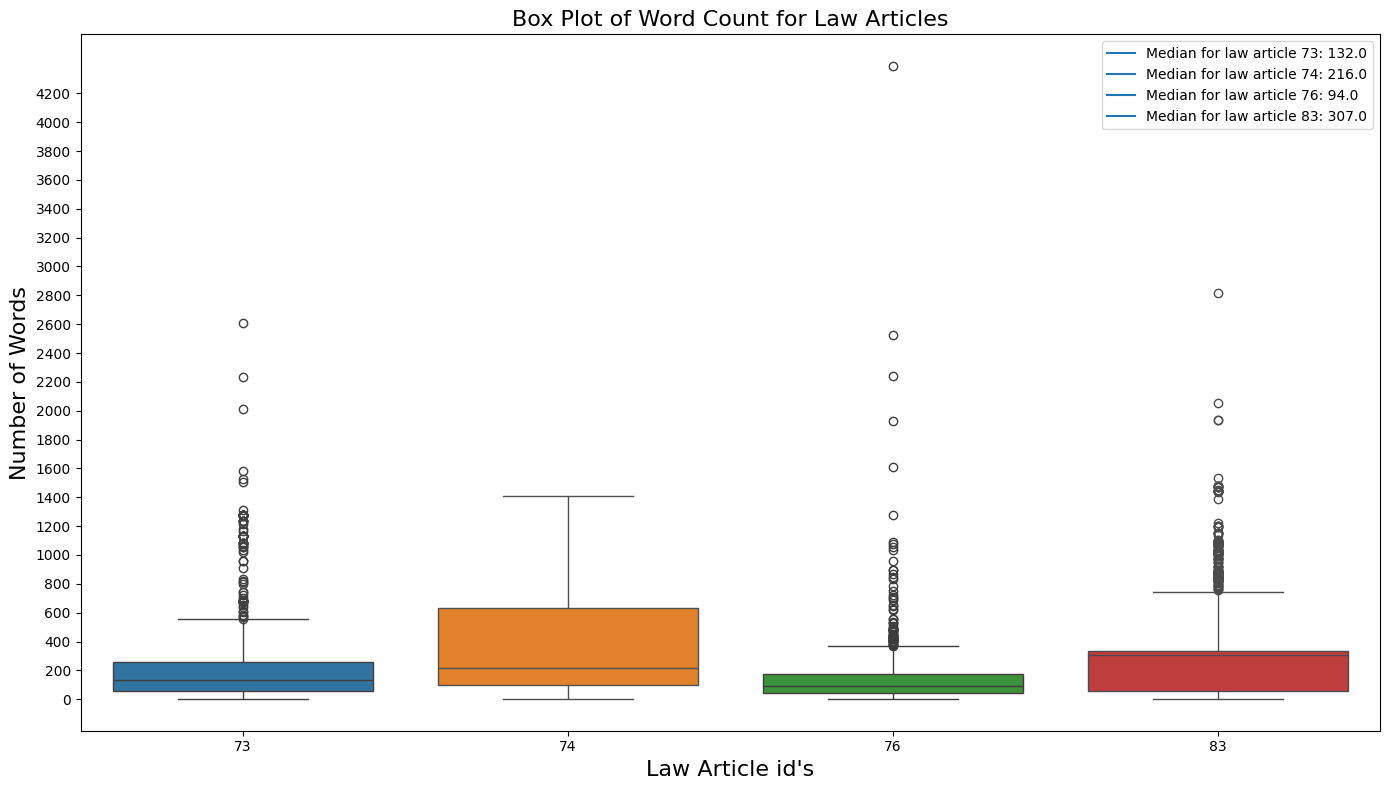

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

def avg_word_length(df, column, term_id, step_y_axis=200, max_y_position = 1500):
    """
    Function for plotting a histogram which show the avg
    and max word counts of each comment
    :param df: pandas dataframe which contains the text
    :param column: column of interest (str)
    :param term_id: article of interest (int)
    :return: plot of a histogram
    """
    # Calculate the maximum and minimum word count values

    df_term = df[df['term_id'] == term_id]
    print(np.unique(df_term['name']))

    median = df_term[column].median()
    sns.boxplot(x=my_cols[1], y=column, data=df_term)
    plt.axhline(median, xmin=0, xmax=0, label=f'Median for law article {term_id}: {median}')
    # plt.text(0, 0, f'{median}', fontsize=12, ha='right', va='top')

    # Add labels and legend
    plt.xlabel("Law Article id's", fontsize=16)
    plt.ylabel('Number of Words', fontsize=16)
    plt.title(f"Box Plot of Word Count for Law Articles", fontsize=16)

    #Adjust the y axis
    max_word_count = df_term[column].max()
    y_tick_positions = [i for i in range(0, max_word_count + max_y_position, step_y_axis)]
    plt.yticks(y_tick_positions)
    


plt.figure(figsize=(14, 8))
avg_word_length(data_def, 'word_count', 73)
avg_word_length(data_def, 'word_count', 74)
avg_word_length(data_def, 'word_count', 76)
avg_word_length(data_def, 'word_count', 83)

plt.legend()
plt.tight_layout()
plt.show()


### FIND OUT HOW EVIDENT NOT-WORD CHARACTERS ARE

In [16]:
import numpy as np
from collections import Counter

# Define regular expression pattern to match special tokens
special_tokens_pattern = r'\W+'

# Find all special tokens in each text
special_tokens = data_def['word_count'].astype(str).str.findall(special_tokens_pattern)

# Concatenate all matches into a single list
all_special_tokens = [token for sublist in special_tokens for token in sublist]


# Get counts of each unique special token
token_counts = Counter(all_special_tokens)

# Print unique special tokens and their counts
if len(token_counts)>0:
    for token, count in token_counts.items():
        print(f"{token}: {count}")
else:
    print('No special token in our comment texts')

No special token in our comment texts


### PUNCTUATION IN REGARDS WITH SENTIMENT ANALYSIS

Common punctuations that clients might use to express sentiment in text include:
* Exclamation marks (!): Used to convey excitement, emphasis, or strong emotion.
* Question marks (?): Indicate uncertainty or curiosity.
* Emoticons/Emoji: Smiley faces 😊, sad faces ☹️, hearts ❤️, etc., used to convey emotions visually.
* Emphasis (e.g., capitalization, repeated punctuation): CAPITALIZATION or !!!!!, often used for emphasis or to convey intensity.

### FIND OUT IF IN OUR COMMENTS WE HAVE EMOTIONS 

In [20]:
import pandas as pd
# !pip install emoji
import emoji

def has_emoji(text):
    """
    Calculate the emojis in a text
    :param text: str
    :return: any emoji
    """
    return any(emoji.emoji_count(char) for char in text)



# Check if 'text' column contains emoji
data_def['has_emoji'] = data_def[my_cols[4]].astype(str).apply(has_emoji)

print(data_def.has_emoji.value_counts())

has_emoji
False    14657
True         1
Name: count, dtype: int64


### CHECK FOR THE FREQUENCY OF STOPWORDS IN OUR CORPUS

In [12]:
import nltk
from nltk.corpus import stopwords  # Import stop words for preprocessing

stop_words = set(stopwords.words('greek'))

In [13]:
print(stop_words)

{'γοῦν', 'δαίσ', 'κατα', 'ὅτι', 'δέ', 'πωσ', 'δὴ', 'αυτεσ', 'εκεινων', 'παρά', 'εἴμι', 'ἐν', 'τον', 'κἀν', 'ἢ', 'ἀφ', 'και', 'τήν', 'ἐγώ', 'πως', 'αὖ', 'μεθ', 'σύ', 'ὦ', 'ποιουσ', 'ἃ', 'οὕτως', 'σόσ', 'περὶ', 'μα', 'την', 'τοί', 'ἀλλά', 'ὑπ', 'ὑπὲρ', 'αἵ', 'ὡσ', 'ἐστι', 'ποιοσ', 'πρὸ', 'ο', 'αυτο', 'διὰ', 'τοιοῦτος', 'εἰσ', 'ποῦ', 'αυτων', 'τίσ', 'εἴ', 'τισ', 'ὅθεν', 'μην', 'οτι', 'ἡ', 'εαν', 'ἤ', "δι'", 'προσ', 'αν', 'ὁ', 'τό', 'οὐχ', 'ἄλλοσ', 'ἐὰν', 'σε', 'ἔτι', 'η', 'ἐάν', 'τὸν', 'οὐχὶ', 'τοτε', 'δε', 'εισαι', 'μετ', 'ομωσ', 'ἐπεὶ', 'που', 'καίτοι', 'ειστε', 'ταῖς', 'τὸ', 'οὐδείσ', 'ἀπ', 'τί', 'ειμαι', 'ὥστε', 'θα', 'μήτε', 'αυτουσ', 'τὰ', 'οὔτε', 'στον', 'εκεινοσ', 'ἀπό', 'δή', 'τῆς', 'πρόσ', 'ὃν', 'ἐγὼ', 'παρα', 'μἐν', 'οὐδεὶς', 'ἀλλ’', 'γα^', 'επ', 'ἐφ', 'ὅπερ', 'τὰς', 'οπωσ', 'ᾧ', 'τινα', 'οἷς', 'τά', 'δαὶ', 'των', 'ισωσ', 'οὗτος', 'εκεινο', 'ποια', 'ἄλλος', 'εκεινη', 'μετα', 'για', 'δαί', 'εἴτε', 'ἀπὸ', 'ἐξ', 'παρ', 'κ', 'ὑπό', 'ἂν', 'καθ', 'ὡς', 'αλλα', 'αἳ', 'ὃς', 'οὖν', 'τότ

In [17]:
from nltk.tokenize import word_tokenize
import string

#tokenize the comments and add them in a new column
data_def['tok_comments'] = data_def[my_cols[4]].apply(lambda x: word_tokenize(x))

In [18]:
# Store all the words in a list
all_tokens = [token for sublist in data_def['tok_comments'] for token in sublist]

# Store the punctuations
punctuations = set(string.punctuation)

# Filter out stopwords
all_stopwords = [token for token in all_tokens if token.lower() in stop_words and token not in punctuations]

# Count the frequency of each token
stopwords_counter = Counter(all_stopwords)

# Get the most common stopwords and their counts
most_common_stopwords = Counter(all_stopwords).most_common(20)

pprint(most_common_stopwords)

[('και', 151228),
 ('του', 84324),
 ('το', 82512),
 ('να', 78875),
 ('την', 70520),
 ('των', 67420),
 ('που', 61170),
 ('με', 57355),
 ('στο', 39523),
 ('για', 38785),
 ('η', 36882),
 ('τα', 31666),
 ('οι', 28424),
 ('σε', 22874),
 ('θα', 19339),
 ('τις', 18394),
 ('ο', 17837),
 ('δεν', 15370),
 ('Η', 10871),
 ('τον', 9989)]


### PLOT THE MOST COMMON STOP WORDS

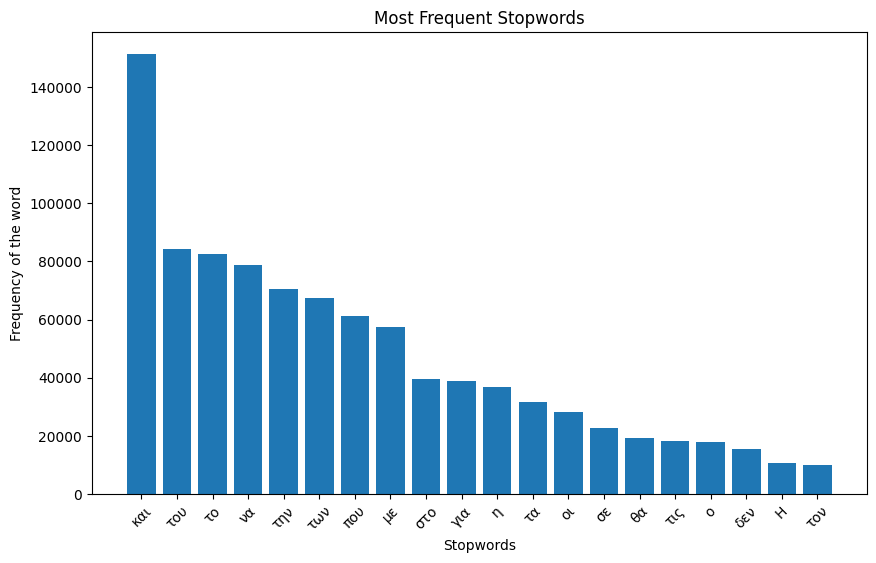

In [19]:
# Plot the 20 most frequent stopwords
plt.figure(figsize=(10, 6))
plt.bar([word for word, count in most_common_stopwords], [count for word, count in most_common_stopwords])
plt.xlabel('Stopwords')
plt.ylabel('Frequency of the word')
plt.title('Most Frequent Stopwords')
plt.xticks(rotation=45)
plt.show()

### CHECK AN EXAMPLE OF OUR CORPUS

In [20]:
data_def[my_cols[4]].head(4)

0    Στο πλαίσιο της δημόσιας διαβούλευσης επί του Τομεακού Προγράμματος Ανάπτυξης 2021 – 2025 του Υπουργείου Εθνικής Άμυνας, η Εθνική Συνομοσπονδία Ατόμων με Αναπηρία (Ε.Σ.Α.μεΑ.) -η οποία αποτελεί την τριτοβάθμια κοινωνική και συνδικαλιστική οργάνωση εκπροσώπησης των ατόμων με αναπηρία, χρόνιες παθήσεις και των οικογενειών τους στη χώρα, κοινωνικό εταίρο της ελληνικής Πολιτείας σε ζητήματα αναπηρίας και ιδρυτικό μέλος του Ευρωπαϊκού Φόρουμ Ατόμων με Αναπηρία, ήτοι του μεγαλύτερου φορέα εκπροσώπησης των ατόμων με αναπηρία και των οικογενειών τους σε ευρωπαϊκό επίπεδο- σας υποβάλλει με το παρόν τις προτάσεις της. \r\nΛαμβάνοντας υπόψη το παρακάτω εθνικό θεσμικό πλαίσιο αναφορικά με την αρχή της μη διάκρισης λόγω αναπηρίας και τη διασφάλιση φυσικής και ηλεκτρονικής προσβασιμότητας στα άτομα με αναπηρία: \r\n-ν. 4074/2012 «Κύρωση της Σύμβασης για τα δικαιώματα των ατόμων με αναπηρίες και του Προαιρετικού Πρωτοκόλλου στη Σύμβαση για τα δικαιώματα των ατόμων με αναπηρίες»  (Αρ. ΦΕΚ 88 Α΄/1

### CLEAN THE CORPUS AND REMOVE THE STOPWORDS-PUNCTUATIONS"

In [21]:
import spacy
import string
import numpy as np
from tqdm import tqdm
import re
# !python -m spacy download el_core_news_sm
# !pip install el_core_news_sm

# Load Greek dataset for manipulating the corpus
nlp = spacy.load('el_core_news_sm', disable=["tagger", "parser","ner", "lemmatizer"])
nlp.add_pipe('sentencizer')


def clean_and_tokenize(X, remove_stopwords=True):
    """
    Tokenize texts in a dataframe and removing punctuations, stopwords,
    non-word characters or singular letters
    :param X: Series of Df (text)
    :param remove_stopwords: whether to remove stopwords
    :return: list of tokenized texts (str)
    """
    
    pattern = re.compile(
        r'\b[α-ωΑ-Ω]{1,3}\b'  # Matches Greek words of 1-3 letters.
        r'|\bν\.\b'  # Matches 'ν.' specifically.
        r'|\b\d{1,2}/\d{1,2}/\d{2,4}\b'  # Matches dates like 31/12/1995.
        r'|\b\d+/\d+(?:/\d+)*\b'  # Matches numbers separated by slashes, possibly multiple segments.
        r'|[΄»«ήέάίϊΐόύϋΰώ-]'  # Matches specific Greek punctuation and accents.
    )
    X_tokenized = []
    cnt = 0
    for id in tqdm(range(len(X))):
        doc = nlp(X[id])
        if cnt == 10:  # If we want to check how well the tokenize was
            print(f'Example: {doc}')
        cnt += 1
        tokens = []
        for token in doc:
            # Check if we want to remove stopwords or not
            if remove_stopwords:
                if '\n' in token.text or "\t" in token.text or "--" in token.text or "*" in token.text or \
                    token.is_stop or token.text in string.punctuation or all(x in string.punctuation for x in token.text) or \
                '##' in token.text or token.like_num or re.match(pattern, str(token)):
                    continue
                if token.text.strip():
                    tokens.append(token.text.replace('"', "'").strip().lower())
            else:
                if '\n' in token.text or "\t" in token.text or "--" in token.text or "*" in token.text or \
                token.text in string.punctuation or all(x in string.punctuation for x in token.text) or \
                '##' in token.text:
                    continue
                if token.text.strip():
                    tokens.append(token.text.replace('"', "'").strip().lower())
        X_tokenized.append(tokens)

    print(f'The same example tokenized: {X_tokenized[10]}')
    return X_tokenized


In [22]:
# Create tokenized comments without stopwords and digits
data_def['tok_comments_no_stopwords'] = clean_and_tokenize(data_def[my_cols[4]].to_list())

  0%|▏                                                                                                                                          | 23/14658 [00:00<02:48, 87.03it/s]

Example: Εάν η παράδοση γίνεται με όρους DPP, τότε υπεύθυνος για τον εκτελωνισμό και την πληρωμή των δασμών είναι ο προμηθευτής.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14658/14658 [02:44<00:00, 89.00it/s]

The same example tokenized: ['παράδοση', 'γίνεται', 'dpp', 'υπεύθυνος', 'εκτελωνισμό', 'πληρωμή', 'δασμών', 'προμηθευτής']


In [23]:
data_def['tok_comments_no_stopwords'].head(3)

0    [πλαίσιο, δημόσιας, διαβούλευσης, τομεακού, προγράμματος, ανάπτυξης, –, υπουργείου, εθνικής, άμυνας, εθνική, συνομοσπονδία, ατόμων, αναπηρία, αποτελεί, τριτοβάθμια, κοινωνική, συνδικαλιστική, οργάνωση, εκπροσώπησης, ατόμων, αναπηρία, χρόνιες, παθήσεις, οικογενειών, χώρα, κοινωνικό, εταίρο, ελληνικής, πολιτείας, ζητήματα, αναπηρίας, ιδρυτικό, μέλος, ευρωπαϊκού, φόρουμ, ατόμων, αναπηρία, μεγαλύτερου, φορέα, εκπροσώπησης, ατόμων, αναπηρία, οικογενειών, ευρωπαϊκό, επίπεδο, υποβάλλει, παρόν, προτάσεις, λαμβάνοντας, παρακάτω, εθνικό, θεσμικό, πλαίσιο, αναφορικά, αρχή, διάκρισης, αναπηρίας, διασφάλιση, φυσικής, ηλεκτρονικής, προσβασιμότητας, αναπηρία, κύρωση, σύμβασης, δικαιώματα, ατόμων, αναπηρίες, προαιρετικού, πρωτοκόλλου, σύμβαση, δικαιώματα, ατόμων, αναπηρίες, συνταξιοδοτικές, ρυθμίσεις, δημοσίου, λοιπές, ασφαλιστικές, διατάξεις, ενίσχυση, προστασίας, εργαζομένων, δικαιώματα, ατόμων, αναπηρίες, διατάξεις, μέρος, κατευθυντήριες, οργανωτικές, διατάξεις, υλοποίησης, σύμβασης, ηνωμένων,

### CLEAN THE COPRUS BUT KEEP STOPWORDS-DIGITS ETC.

In [24]:
# Create tokenized comments with all the stopwords and digits
data_def['tok_comments_with_stopwords'] = clean_and_tokenize(data_def[my_cols[4]].to_list(), remove_stopwords=False)

  0%|▎                                                                                                                                         | 31/14658 [00:00<02:20, 104.29it/s]

Example: Εάν η παράδοση γίνεται με όρους DPP, τότε υπεύθυνος για τον εκτελωνισμό και την πληρωμή των δασμών είναι ο προμηθευτής.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14658/14658 [02:43<00:00, 89.51it/s]

The same example tokenized: ['εάν', 'η', 'παράδοση', 'γίνεται', 'με', 'όρους', 'dpp', 'τότε', 'υπεύθυνος', 'για', 'τον', 'εκτελωνισμό', 'και', 'την', 'πληρωμή', 'των', 'δασμών', 'είναι', 'ο', 'προμηθευτής']


In [25]:
data_def['tok_comments_with_stopwords'].head(3)

0        [στο, πλαίσιο, της, δημόσιας, διαβούλευσης, επί, του, τομεακού, προγράμματος, ανάπτυξης, 2021, –, 2025, του, υπουργείου, εθνικής, άμυνας, η, εθνική, συνομοσπονδία, ατόμων, με, αναπηρία, ε.σ.α.μεα, -η, οποία, αποτελεί, την, τριτοβάθμια, κοινωνική, και, συνδικαλιστική, οργάνωση, εκπροσώπησης, των, ατόμων, με, αναπηρία, χρόνιες, παθήσεις, και, των, οικογενειών, τους, στη, χώρα, κοινωνικό, εταίρο, της, ελληνικής, πολιτείας, σε, ζητήματα, αναπηρίας, και, ιδρυτικό, μέλος, του, ευρωπαϊκού, φόρουμ, ατόμων, με, αναπηρία, ήτοι, του, μεγαλύτερου, φορέα, εκπροσώπησης, των, ατόμων, με, αναπηρία, και, των, οικογενειών, τους, σε, ευρωπαϊκό, επίπεδο, σας, υποβάλλει, με, το, παρόν, τις, προτάσεις, της, λαμβάνοντας, υπόψη, το, παρακάτω, εθνικό, θεσμικό, πλαίσιο, αναφορικά, με, την, αρχή, της, μη, ...]
1    [α, να, προστεθεί, παράγραφος, 3, ως, εξής, 3., στις, συμβάσεις, που, εμπίπτουν, στις, εξαιρέσεις, του, νόμου, εφαρμογή, άρθρου, 346, σλεε, διακρατικές, κλπ., πρέπει, να, λαμβάνεται, υπόψη, η

### CALCULATE THE MOST FREQUENT WORDS FOR A TERM_ID WITHOUT STOPWORDS

We are going to implement lemmatization in order to be able to compare the most frequent words of each term_id and observe any similarities

In [26]:
# Join the tokens in each comment
data_def['comments_no_stopwords'] = data_def['tok_comments_no_stopwords'].apply(lambda x: ' '.join(token for token in x))

# Join the tokens in each comment
data_def['comments_with_stopwords'] = data_def['tok_comments_with_stopwords'].apply(lambda x: ' '.join(token for token in x))

In [ ]:
# Load Greek language model
nlp = spacy.load('el_core_news_sm', disable=["parser"])

#Create lemmatized column for tokens of each text
data_def['lemmatized_comments_no_stopwords'] = data_def['comments_no_stopwords'].apply(lambda x: [token.lemma_ for token in nlp(x)])

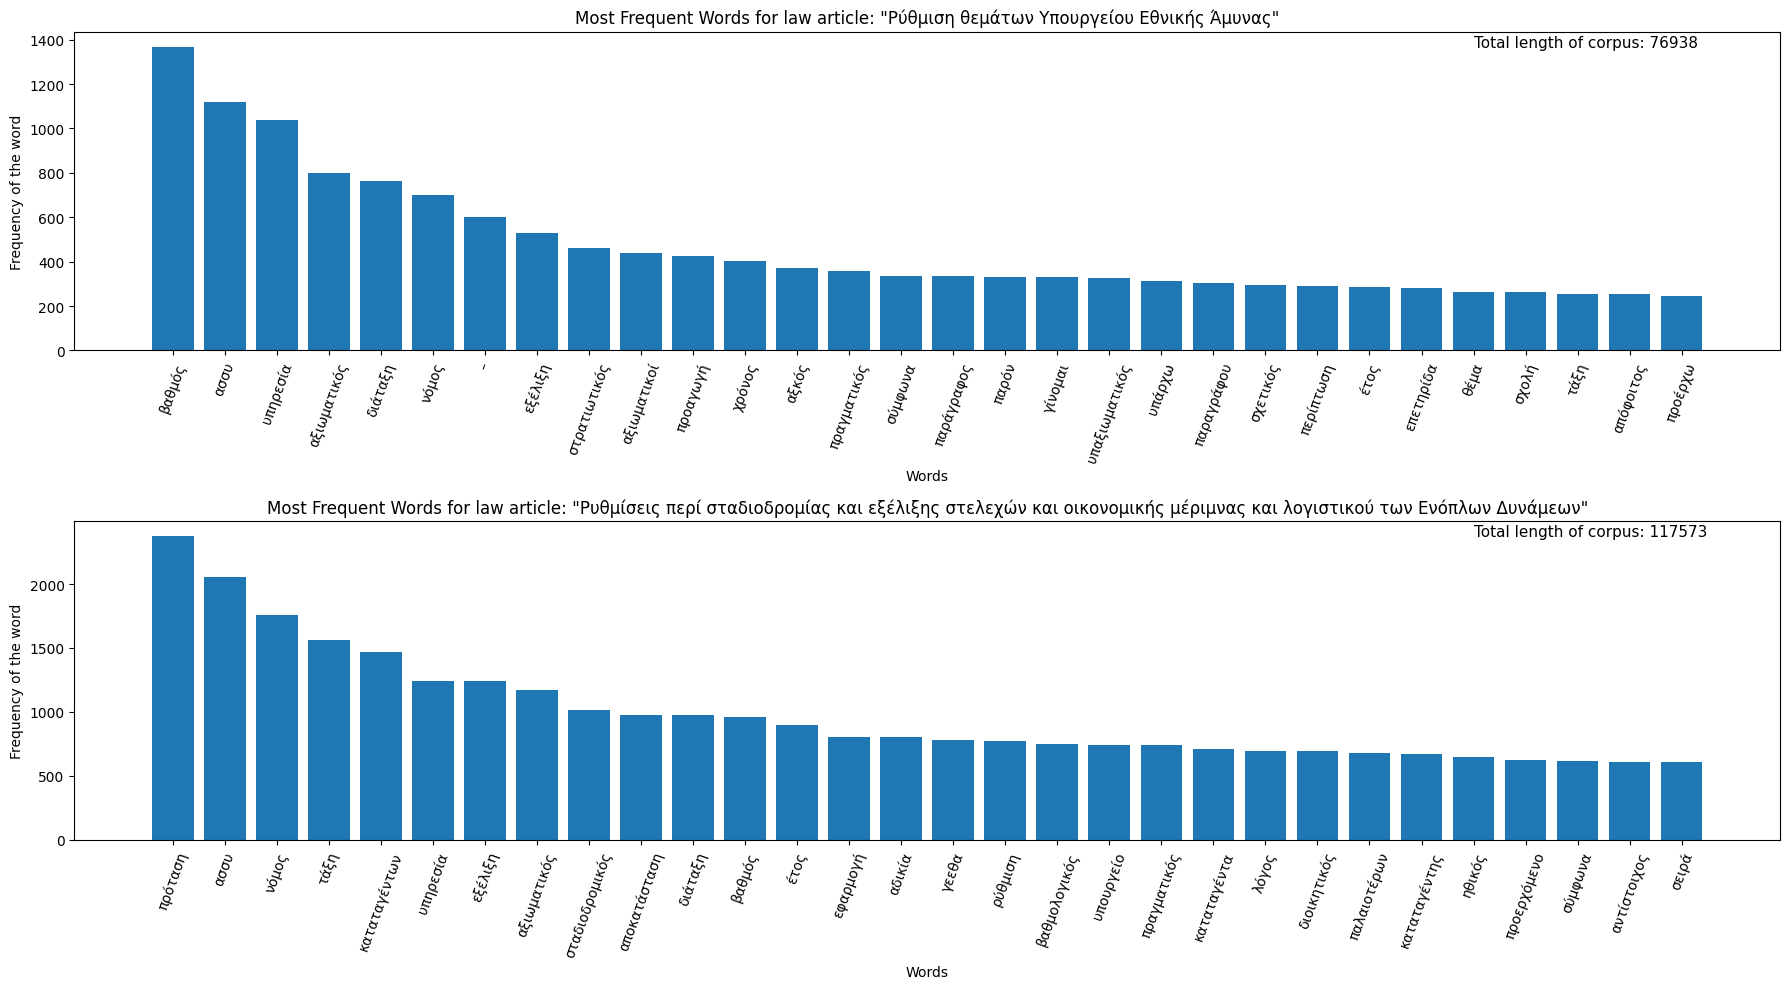

In [99]:
def calc_most_common_tokens(df, column, term_id):
    """
    Calculate the most common token in an article in our dataset
    :param df: pandas dataframe
    :param column: str (column name of interest)
    :param term_id: int (article of interest)
    :return: array of tokens (most common in an article)
    """
    # Store all the words in a list that do not contain stopwords
    df_term = df[df['term_id'] == term_id]
    # Define the name of the article
    article_name = df_term.iloc[1]['name']

    # Extract all tokens from the comments
    filtered_tokens_no_stop = [token for sublist in df_term[column] for token in sublist]

    total_count_words = len(filtered_tokens_no_stop)

    # Count the frequency of each token
    token_counter = Counter(filtered_tokens_no_stop)

    max_count = max(token_counter.values())
    # Get the most common stopwords and their counts
    most_common_words = token_counter.most_common(30)


    # Plot the 30 most frequent stopwords
    plt.bar([word for word, count in most_common_words], [count for word, count in most_common_words])
    plt.xlabel('Words')
    plt.text(25, max_count, f'Total length of corpus: {total_count_words}', fontsize=11)
    plt.ylabel('Frequency of the word')
    plt.title(f'Most Frequent Words for law article: "{article_name}"')
    plt.xticks(rotation=70)

    # Get the most common stopwords and their counts
    most_common_words = token_counter.most_common(150)
    most_common_tokens = [word for word, count in most_common_words]
    return most_common_tokens
        
# Figure and plot size
fig = plt.figure(figsize=(18, 10))

# Store the most common words of each term id
most_common_words = {}

# Plot the data using subplots
for i, term_id in enumerate([73, 74]):
    ax = fig.add_subplot(2, 1, i+1)
    most_common = calc_most_common_tokens(data_def, 'lemmatized_comments_no_stopwords', term_id)
    most_common_words[term_id] = most_common

plt.tight_layout()
plt.show()

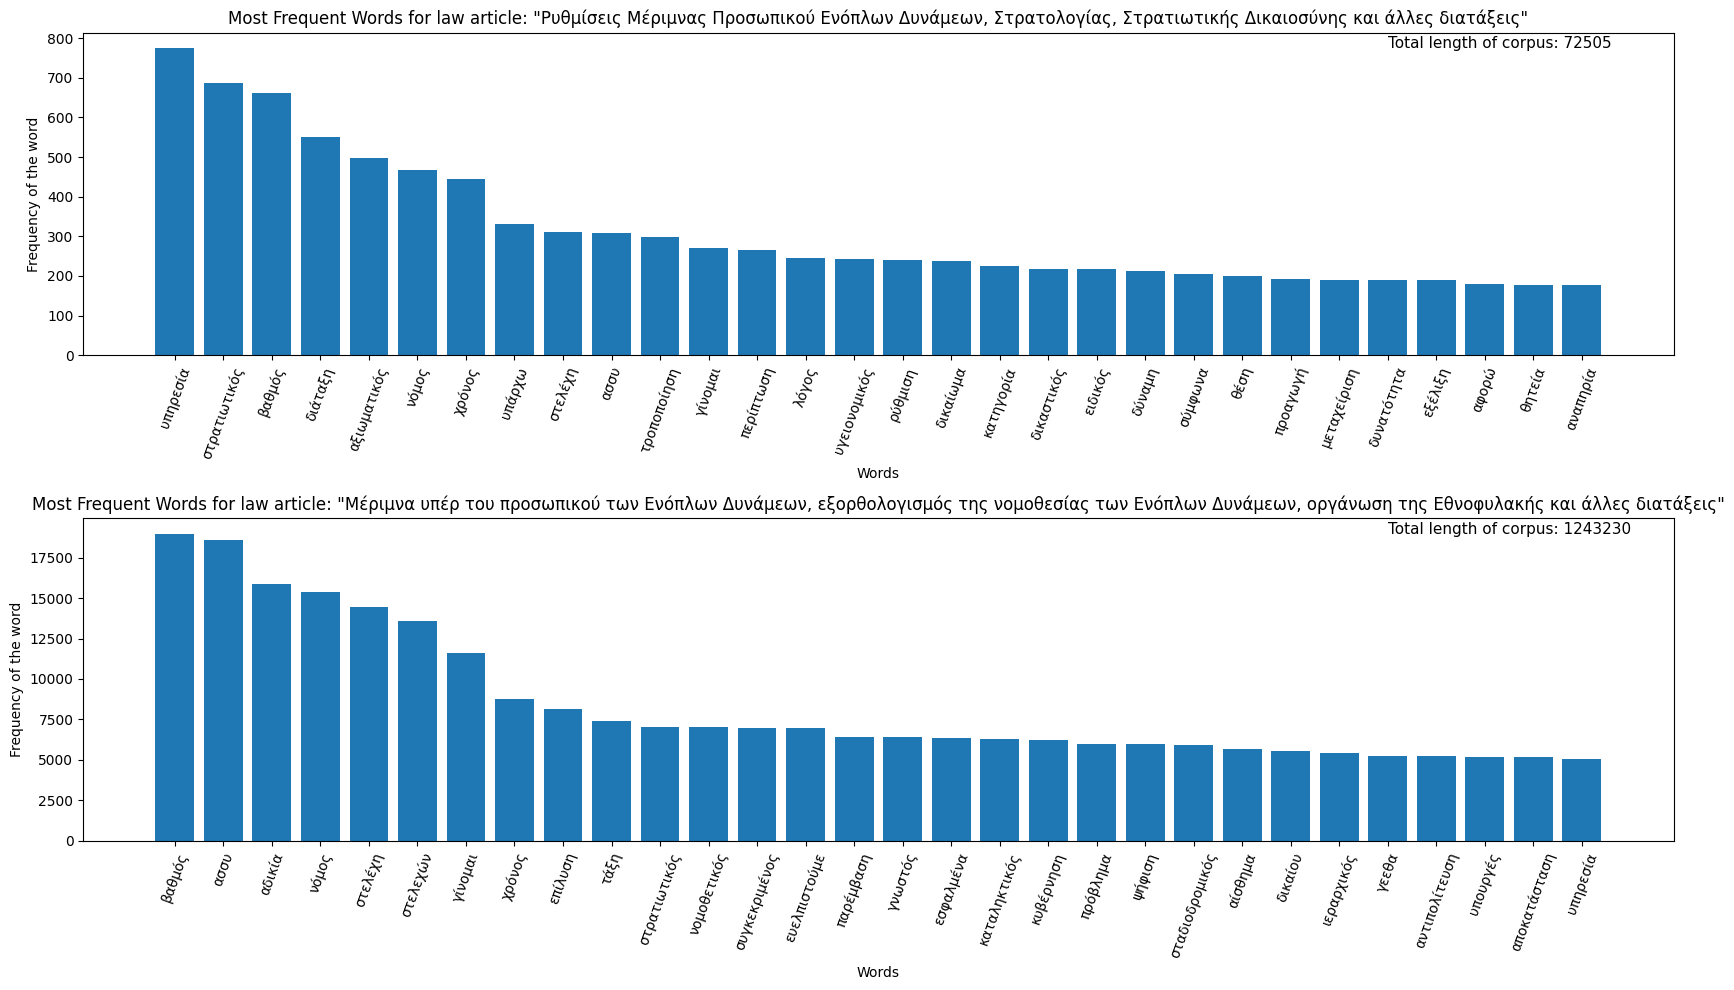

In [100]:
# Figure and plot size
fig = plt.figure(figsize=(17, 10))

# Plot the data using subplots
for i, term_id in enumerate([76, 83]):
    ax = fig.add_subplot(2, 1, i+1)
    most_common = calc_most_common_tokens(data_def, 'lemmatized_comments_no_stopwords', term_id)    
    most_common_words[term_id] = most_common

plt.tight_layout()
plt.show()

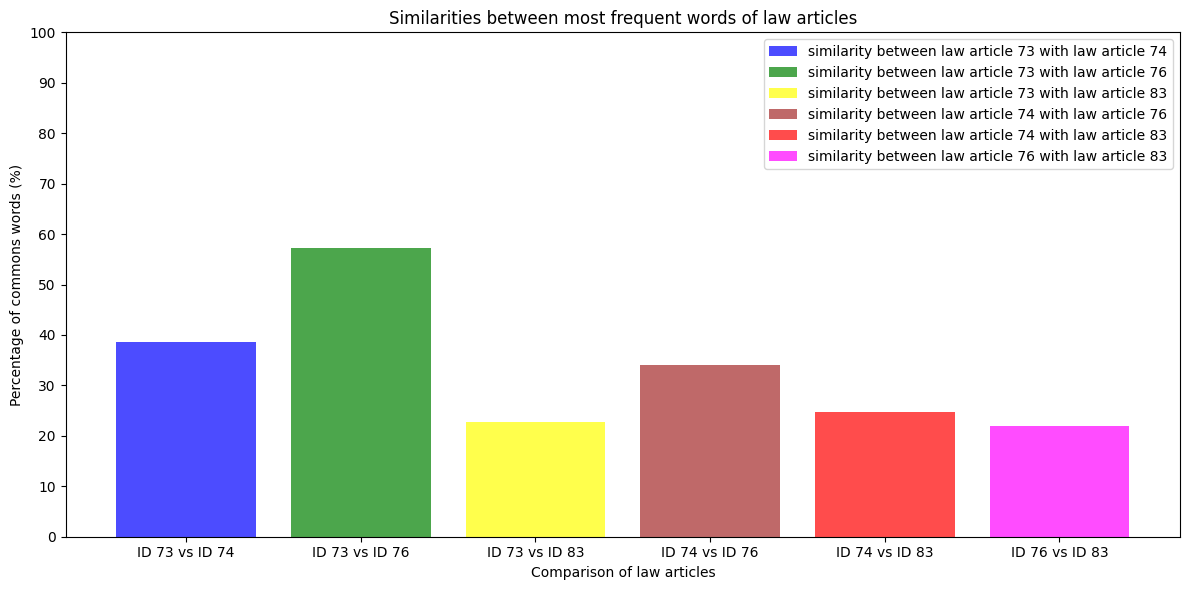

In [76]:
similarity_between_73_74 = len(set(most_common_words[73]).intersection(set(most_common_words[74])))
similarity_between_73_76 = len(set(most_common_words[73]).intersection(set(most_common_words[76])))
similarity_between_74_76 = len(set(most_common_words[74]).intersection(set(most_common_words[76])))
similarity_between_73_83 = len(set(most_common_words[73]).intersection(set(most_common_words[83])))
similarity_between_74_83 = len(set(most_common_words[74]).intersection(set(most_common_words[83])))
similarity_between_76_83 = len(set(most_common_words[76]).intersection(set(most_common_words[83])))


cluster_counts = [similarity_between_73_74, similarity_between_73_76, 
                  similarity_between_73_83, similarity_between_74_76, 
                 similarity_between_74_83, similarity_between_76_83]

# Normalization of cluster counts
cluster_counts = [100*count/150 for count in cluster_counts]

labels = ['similarity between law article 73 with law article 74',
          'similarity between law article 73 with law article 76',
          'similarity between law article 73 with law article 83',
          'similarity between law article 74 with law article 76',
          'similarity between law article 74 with law article 83',
          'similarity between law article 76 with law article 83']

cluster_values = ['ID 73 vs ID 74', 'ID 73 vs ID 76',
                 'ID 73 vs ID 83', 'ID 74 vs ID 76',
                 'ID 74 vs ID 83', 'ID 76 vs ID 83']

colors = ['blue', 'green', 'yellow', 'brown', 'red', 'magenta']
plt.figure(figsize=(12,6))
plt.bar(cluster_values, cluster_counts, align='center', label=labels, alpha=0.7, color = colors)
plt.xlabel('Comparison of law articles')
plt.ylabel('Percentage of commons words (%)')
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.ylim(0, 100)
plt.title('Similarities between most frequent words of law articles')
plt.legend()
plt.tight_layout()
plt.show()

### CHECK NOW AFTER THE PREPROCESS, THE AVERAGE LENGTH OF THE COMMENTS

['Ρύθμιση θεμάτων Υπουργείου Εθνικής Άμυνας']
['Ρυθμίσεις περί σταδιοδρομίας και εξέλιξης στελεχών και οικονομικής μέριμνας και λογιστικού των Ενόπλων Δυνάμεων']
['Ρυθμίσεις Μέριμνας Προσωπικού Ενόπλων Δυνάμεων, Στρατολογίας, Στρατιωτικής Δικαιοσύνης και άλλες διατάξεις']
['Μέριμνα υπέρ του προσωπικού των Ενόπλων Δυνάμεων, εξορθολογισμός της νομοθεσίας των Ενόπλων Δυνάμεων, οργάνωση της Εθνοφυλακής και άλλες διατάξεις']


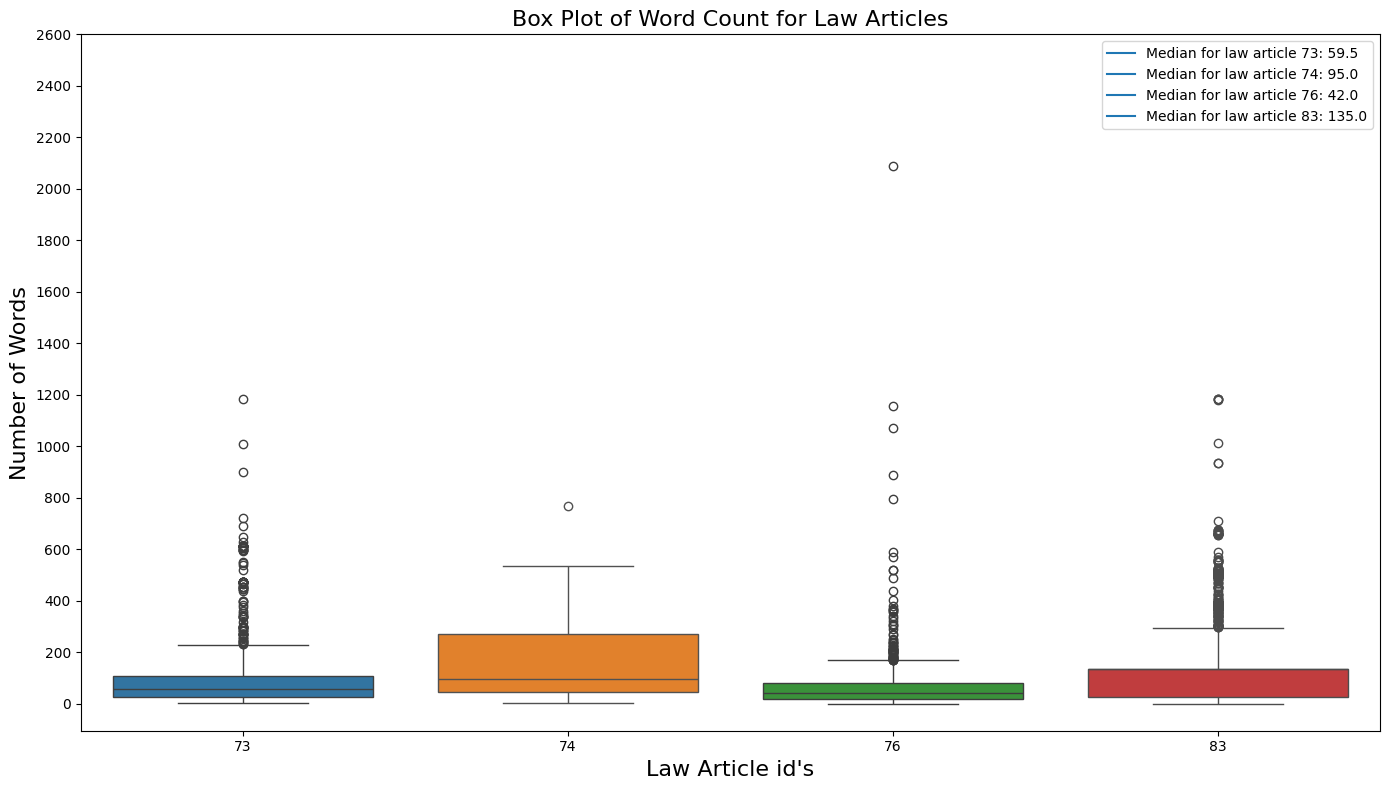

In [64]:
# Apply the function to 'text' column
data_def['word_count_no_stopwords'] = data_def['comments_no_stopwords'].apply(lambda x: no_of_words(x) if isinstance(x, str) else 0)


plt.figure(figsize=(14,8))
# Plot the data using subplots
for i, term_id in enumerate([73, 74, 76, 83]):
    avg_word_length(data_def, 'word_count_no_stopwords', term_id)

plt.legend()
plt.tight_layout()
plt.show()

### RESULTS SO FAR

It is evident that approximately half of the words in the text consist of stopwords and punctuations. The average word count, including stopwords, etc., stands at 243.8, while upon their removal, it reduces to 126.7.

Additionally, it's important noting that for a Greek Dataset, certain libraries like NLTK may encounter issues as they do not include all the stop_words. However, Spacy offers a highly efficient library ('el_core_news_sm') which includes a comprehensive set of stop_words. Hence, we should use **Spacy** for a more efficient manipulation of a Greek Dataset.

Moreover, the most frequent words (excluding stop_words) are in strong relation with the ministry under consideration. For instance, words such as 'στελέχη', 'βαθμό', 'υπηρεσίες', 'εδ' exhibit a significant association with the Ministry of Defence. Consequently, it's imperative to acknowledge that discussions on varied topics may yield distinct word distributions. Thus, for an LLM to effectively contribute or enhance such discussions, it should be fine-tuned in different data structures.

Furthermore, it's noteworthy that discussions like the one described may contain numerous outliers. Despite the average word count being 126.7, the maximum count reaches 2402, which is 19 times higher than the average. 

Also, per term_id the avg length deviates a lot, so we cannot extract very robust information for the word length. 

Finally, by taking into account the variability of comment lengths during discussions, it's very important to ensure an efficient list of training examples during the fine-tuning phase of an LLM. As per OpenAI's documentation for fine-tuning, it's recommended to include at least 50-100 training examples, in order to observe clear imporvements. 

## LETS GO DEEPER IN OUR DATASET

### NAME ENTITY RECOGNITION IN OUR CORPUS

In [40]:
# Load Greek dataset for manipulating the corpus inlcuding ner 
nlp = spacy.load('el_core_news_sm', disable=["parser", "lemmatizer"])

# Store entities in each comment
data_def['ner_entities'] = data_def['comments_no_stopwords'].apply(lambda x: [ent.label_ for ent in nlp(x).ents])

In [59]:
print(data_def['ner_entities'].sample(10))

3650        []
2717        []
4060        []
13736       []
2845        []
5547     [GPE]
4329        []
4684        []
7368        []
11133       []
Name: ner_entities, dtype: object


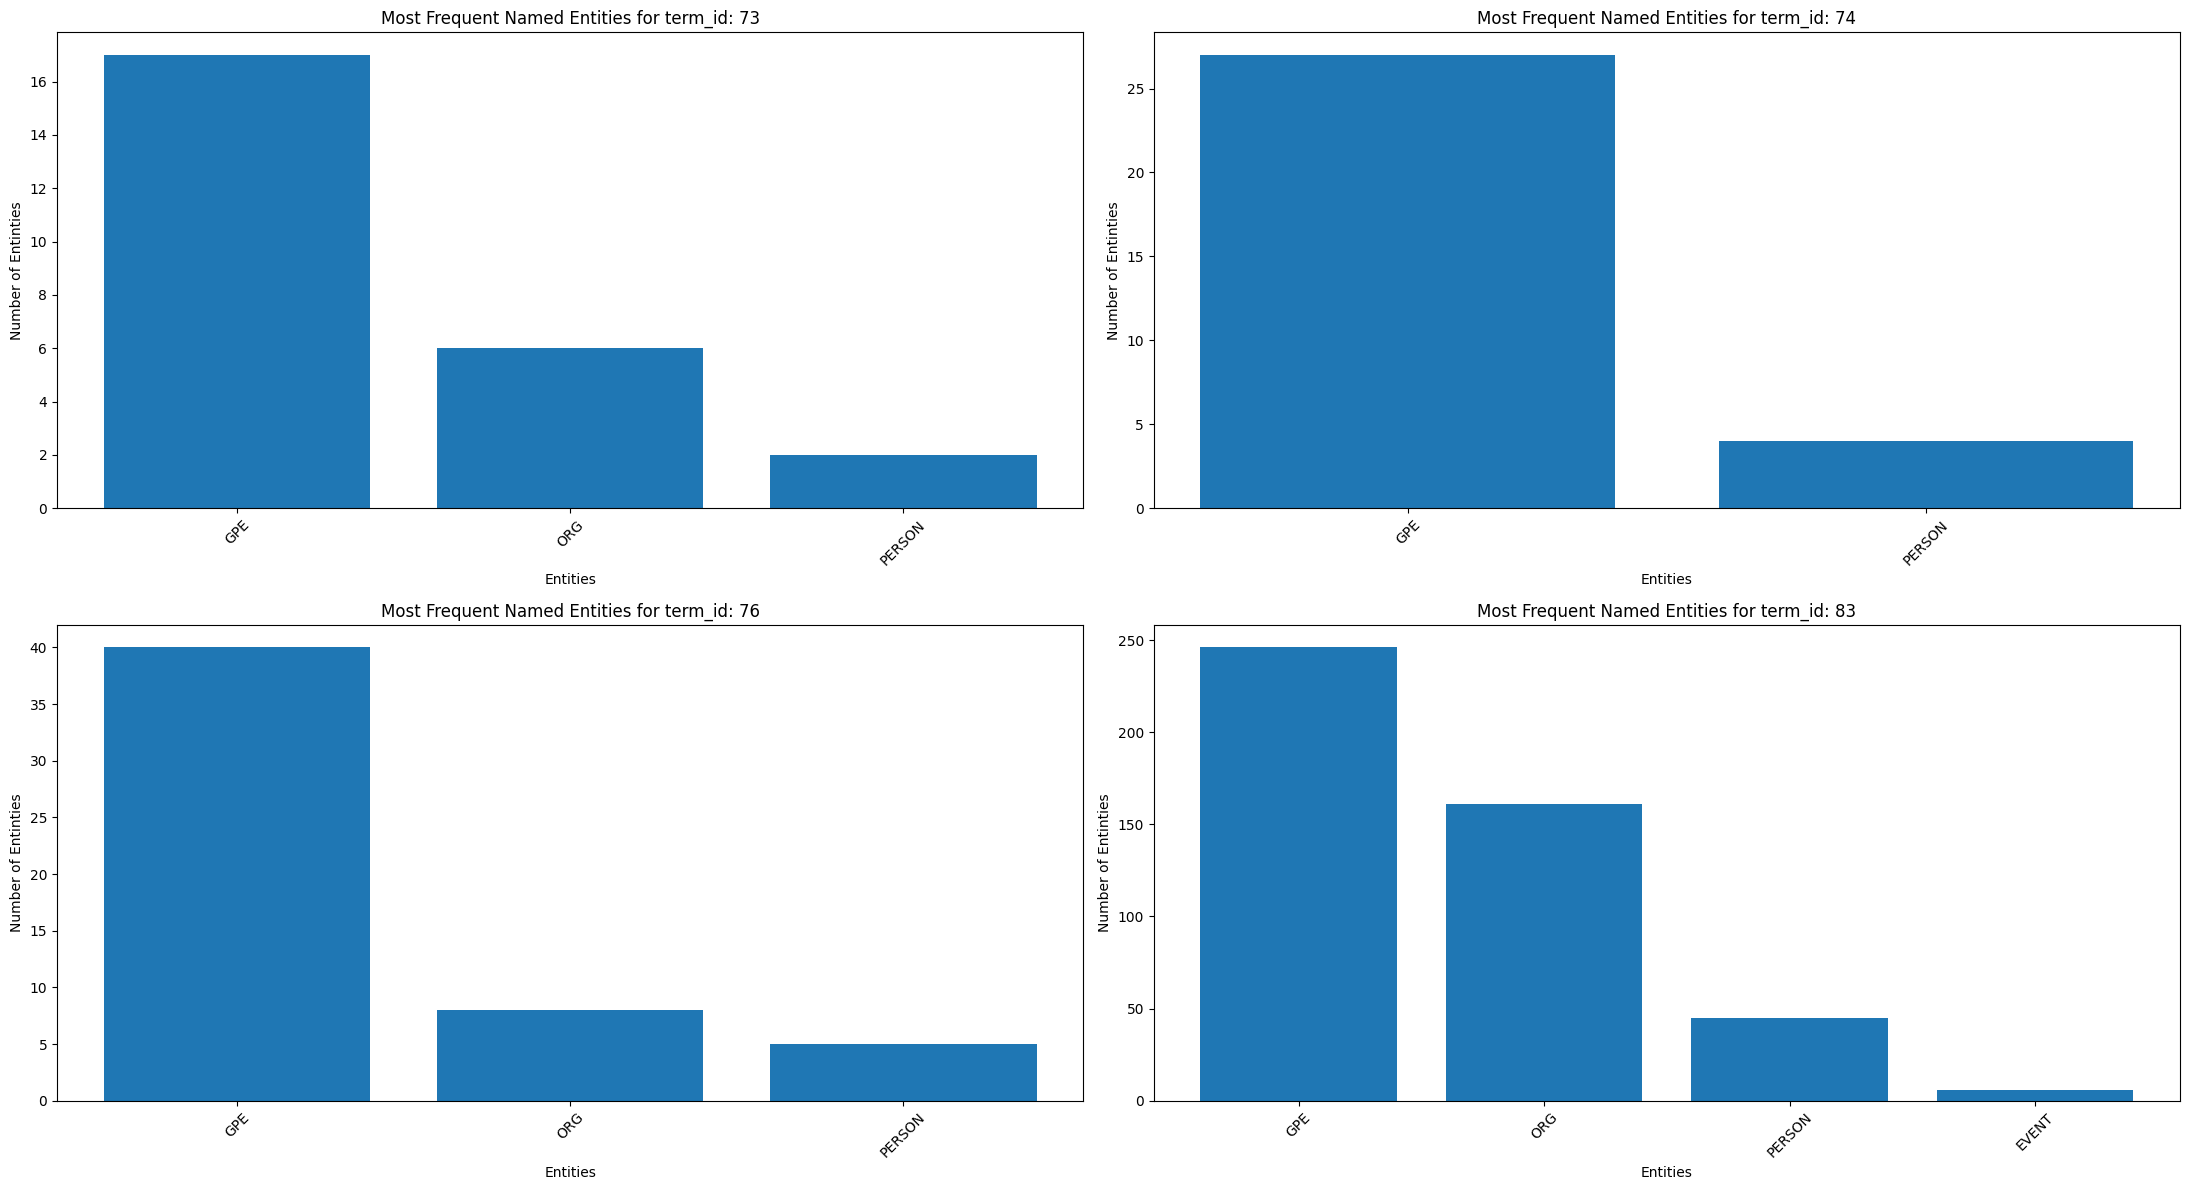

In [60]:
def calc_ner(df, column, term_id):
    """
    Calculate the most common NER in an article in our dataset
    :param df: pandas dataframe
    :param column: str (column name of interest)
    :param term_id: int (article of interest)
    :return: array of tokens (most common in an article)
    """

    # Store all the entities in a list per term_id
    df_term = df[df['term_id'] == term_id]
    entities_term = [token for sublist in df_term[column] for token in sublist]


    # Count the frequency of each entity
    entity_counter = Counter(entities_term)

    # Get the most common entities and their counts
    most_common_entities = entity_counter.most_common(10)  # Adjust the number as needed

    #prepare the plot
    plt.bar([entity for entity, count in most_common_entities], [count for entity, count in most_common_entities])
    plt.xlabel('Entities')
    plt.ylabel('Number of Entinties')
    plt.title(f'Most Frequent Named Entities for term_id: {term_id}')
    plt.xticks(rotation=45)

    return most_common_entities
# Figure for the most common entities per term_id
fig = plt.figure(figsize=(22, 12))

# Plot the data using subplots
for i, term_id in enumerate([73, 74, 76, 83]):
    ax = fig.add_subplot(2, 2, i+1)
    calc_ner(data_def, 'ner_entities', term_id)

plt.tight_layout()
plt.show()

## POS-TAGGING IN OUR CORPUS

#### Unfortunately, Spacy do not have a tagger in Greek language, in order to tag each word and plot the most common.
#### However, we found a transformer in Hugging Face which does the works and very efficiently. The documentation reports that for POS-TAGGING in Greek the accuracy is 98%, thus we can use it.

In [61]:
%%capture
!pip install transformers==4.38.1
# Check the version of our package *transformer*
import transformers

In [62]:
%%capture
!pip install torch==2.2.0 torchvision==0.17.0 torchaudio==2.2.0 --index-url https://download.pytorch.org/whl/cu118
!pip install torchmetrics torchtext --index-url https://download.pytorch.org/whl/cu118
import torch

In [63]:
print(transformers.__version__)
print(torch.__version__)

4.38.1
2.2.0+cu118


In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained("wietsedv/xlm-roberta-base-ft-udpos28-el")
model = AutoModelForTokenClassification.from_pretrained("wietsedv/xlm-roberta-base-ft-udpos28-el")

### TRANSFORMER FOR PREDICTING POS-TAGS OF OUR CORPUS

### RUN TRANSFORMER ON GPU

In [92]:
# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device('cuda')
    print("CUDA is available. Running on GPU.")
    # Put the model on GPU
    model = model.to(device)  # Move the model to the specified device

CUDA is available. Running on GPU.


In [93]:
print(device)

cuda


In [80]:
import torch

def predict_pos_tags(comment):
    """
    Function for predicting POS tags for a single comment
    :param comment: str text
    :return: predicted tags (str)
    """
    # Tokenize input comment
    inputs = tokenizer(comment, return_tensors="pt", padding=True, truncation=True).to(device)

    # Forward pass through the model
    with torch.no_grad():
        outputs = model(**inputs)

    # Get predicted labels (POS tags)
    predicted_labels = torch.argmax(outputs.logits, dim=2)

    # Decode predicted labels
    predicted_tags = [model.config.id2label[label] for label in predicted_labels.squeeze().tolist()]

    return predicted_tags


# Apply POS tagging to each comment in the DataFrame
data_def['pos_tags_no_stopwords'] = data_def['comments_no_stopwords'].apply(predict_pos_tags)

# Print the DataFrame with predicted POS tags
print(data_def['pos_tags_no_stopwords'].head(5))

0    [NOUN, NOUN, ADJ, DET, NOUN, NOUN, NOUN, NOUN, ADJ, ADJ, ADJ, NOUN, NOUN, PUNCT, NOUN, ADJ, DET, NOUN, DET, ADJ, NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, VERB, ADJ, ADJ, ADJ, ADJ, ADJ, ADJ, ADJ, ADJ, ADJ, NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, ADJ, ADJ, ADJ, NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, ADJ, NOUN, NOUN, NOUN, NOUN, ADJ, NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, DET, ADJ, ADJ, ADJ, NOUN, ADJ, ADJ, DET, NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, ADJ, DET, NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, ADJ, ...]
1                [NOUN, VERB, VERB, VERB, NOUN, NOUN, DET, NOUN, NOUN, NOUN, VERB, VERB, VERB, NOUN, NOUN, NOUN, NOUN, NOUN, NOUN, X, X, X, ADJ, ADJ, ADJ, VERB, VERB, NOUN, NOUN, NOUN, NOUN, VERB, VERB, VERB, VERB, ADJ, ADJ, ADJ, ADJ, ADJ, ADJ, ADJ, ADJ, ADJ, NOUN, ADJ, NOUN, ADJ, DET, NOUN, NOUN, NOUN, DET, ADJ, ADJ, ADJ, ADJ, NOUN, NOUN, NOUN, ADJ, ADJ, ADJ, ADJ, NOUN, VERB, VERB, VERB, VERB, ADJ, ADJ, ADJ, ADJ, DET

### PLOT THE MOST COMMON POS-TAGS

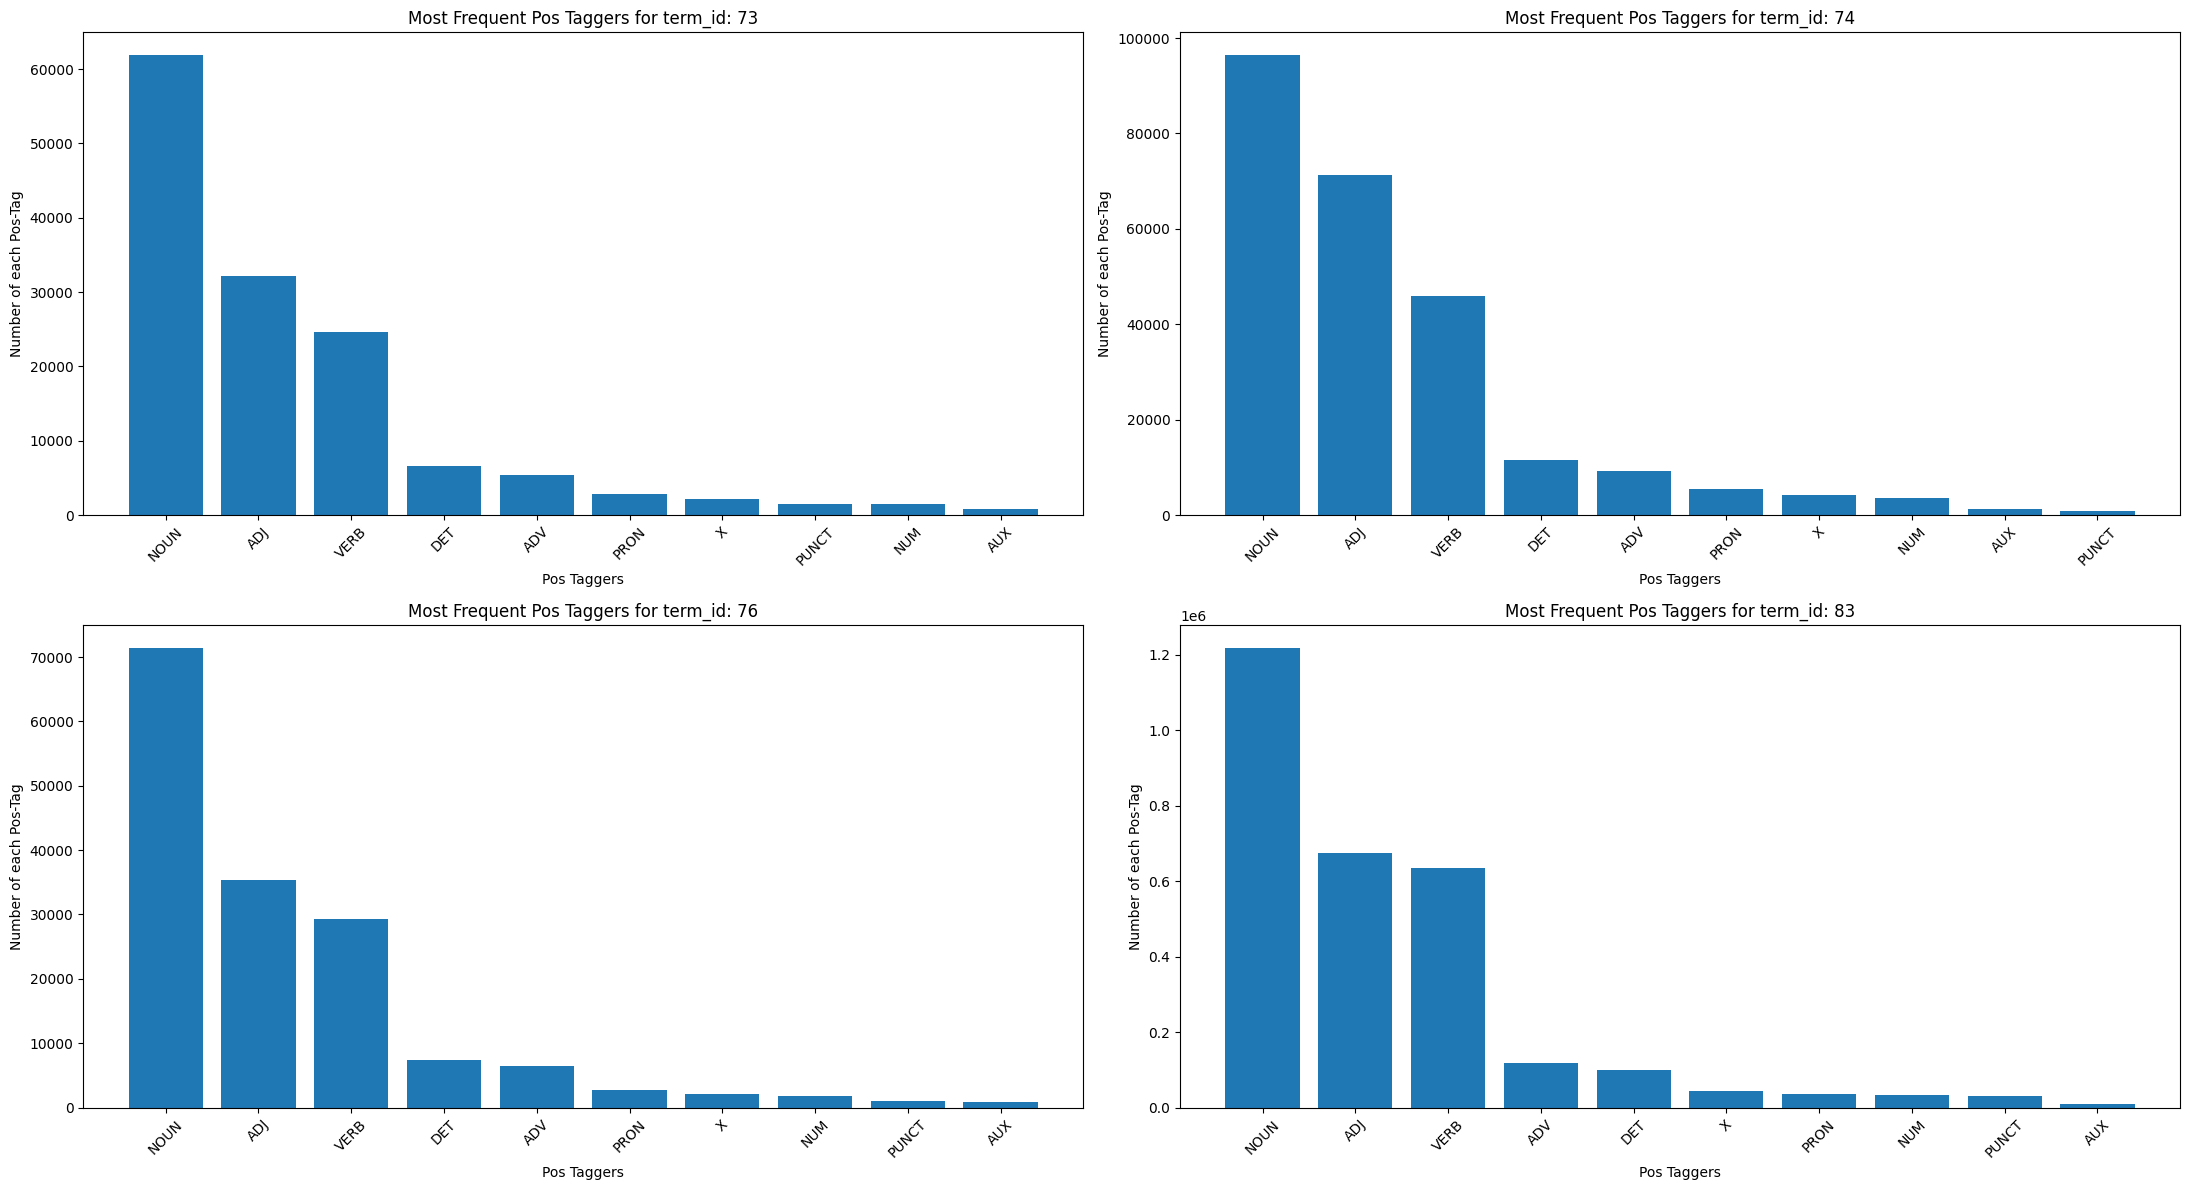

In [81]:
def calc_pos_tags(df, column, term_id):
    """
    Calculate the most common POS TAGS in an article in our dataset
    :param df: pandas dataframe
    :param column: str (column name of interest)
    :param term_id: int (article of interest)
    :return: array of POS TAGS (most common in an article)
    """
    # Store a new dataframe which contains only the data for a specific term_id
    df_term = df[df['term_id'] == term_id]
    
    
    # Flatten the list of pos-taggings
    all_tags = [tag for sublist in df_term[column] for tag in sublist]
    
    # Count the frequency of each tagger
    pos_tag_counter = Counter(all_tags)
    
    # Get the most common taggers and their counts
    most_common_tags= pos_tag_counter.most_common(10)  # Adjust the number as needed
    
    # Plot the most common entities
    plt.bar([tag for tag, count in most_common_tags], [count for tag, count in most_common_tags])
    plt.xlabel('Pos Taggers')
    plt.ylabel('Number of each Pos-Tag')
    plt.title(f'Most Frequent Pos Taggers for term_id: {term_id}')
    plt.xticks(rotation=45)

    return all_tags

# Figure for the most common entities per term_id
fig = plt.figure(figsize=(22, 12))

# Plot the data using subplots
for i, term_id in enumerate([73, 74, 76, 83]):
    ax = fig.add_subplot(2, 2, i+1)
    _ = calc_pos_tags(data_def, 'pos_tags_no_stopwords', term_id)

plt.tight_layout()
plt.show()

## CALCULATE BIGRAM AND TRIGRAM COUNTER TO CHECK THE MOST COMMON BIGRAMS AND TRIGRAMS

We are going to use ngram counters (bigram, trigram), without including stop words. We want to observe strong relations between words (words that are close to each other).
We used the corpus without stop words for the reason that we observes that including stopwords we could not check for any relations between words.

In [82]:
from nltk.util import ngrams

def calc_ngram(df, column, term_id):
    """
    Calculate the most common bigram and trigram counters in an article in our dataset
    :param df: pandas dataframe
    :param column: str (column name of interest)
    :param term_id: int (article of interest)
    :return: array of most common ngram counters (most common in an article)
    """
    # Store a new dataframe which contains only the data for a specific term_id
    df_term = df[df['term_id'] == term_id]

    # Create bigram and trigram Counters
    bigram_counter = Counter()
    trigram_counter = Counter()
    
    for sent in df_term[column].to_list():
    
        # We do not use padding in the bigram because we will get worse results (most of the results are with pads)
        bigram_counter.update([gram for gram in ngrams(sent, 2, pad_left=False, pad_right=False,
                                                           left_pad_symbol='<s>', right_pad_symbol='<e>')])
        
        trigram_counter.update([gram for gram in ngrams(sent, 3, pad_left=True, pad_right=True,
                                                            left_pad_symbol='<s>', right_pad_symbol='<e>')])


    bigram_counter_most_common = bigram_counter.most_common(20)
    trigram_counter_most_common = trigram_counter.most_common(20)
    print('10 most common words for bigram counter:')
    pprint(bigram_counter.most_common(10))
    print('10 most common words for trigram counter:')
    pprint(trigram_counter.most_common(10))
    print('---------------------------------------------------------------------------------------------')

    return bigram_counter_most_common, trigram_counter_most_common

# Dictionaries to store counters
bigram_counters = {}
trigram_counters = {}

# Print and store the most common ngrams for each term
for i, term_id in enumerate([73, 74, 76, 83]):
    bigram_counters[term_id], trigram_counters[term_id] = calc_ngram(data_def, 'tok_comments_no_stopwords', term_id)

10 most common words for bigram counter:
[(('στρατιωτικής', 'υπηρεσίας'), 222),
 (('πραγματικής', 'υπηρεσίας'), 187),
 (('παρόντος', 'νόμου'), 160),
 (('βαθμολογική', 'εξέλιξη'), 153),
 (('πραγματικής', 'στρατιωτικής'), 137),
 (('απόφοιτοι', 'ασσυ'), 137),
 (('παραγράφου', '´'), 130),
 (('περίπτωσης', '5)'), 125),
 (('5)', 'παραγράφου'), 122),
 (('σύμφωνα', 'διατάξεις'), 119)]
10 most common words for trigram counter:
[(('πραγματικής', 'στρατιωτικής', 'υπηρεσίας'), 137),
 (('περίπτωσης', '5)', 'παραγράφου'), 122),
 (('5)', 'παραγράφου', '´'), 114),
 (('υποσμηναγού', 'ανθυποπλοιάρχου', '–'), 103),
 (('ανθυποπλοιάρχου', '–', 'υπολοχαγού'), 103),
 (('τηρείται', 'ιδιαίτερη', 'επετηρίδα'), 96),
 (('ακόλουθη', 'διατύπωση', 'αξιωματικοί'), 95),
 (('βαθμό', 'υποσμηναγού', 'ανθυποπλοιάρχου'), 95),
 (('νεότεροι', 'λοιπών', 'ομοιοβάθμων'), 85),
 (('αξιωματικοί', 'περίπτωσης', '5)'), 82)]
---------------------------------------------------------------------------------------------
10 most common w

### USE OF WORDCLOUD TO PRINT THE MOST IMPORTANT NGRAMS

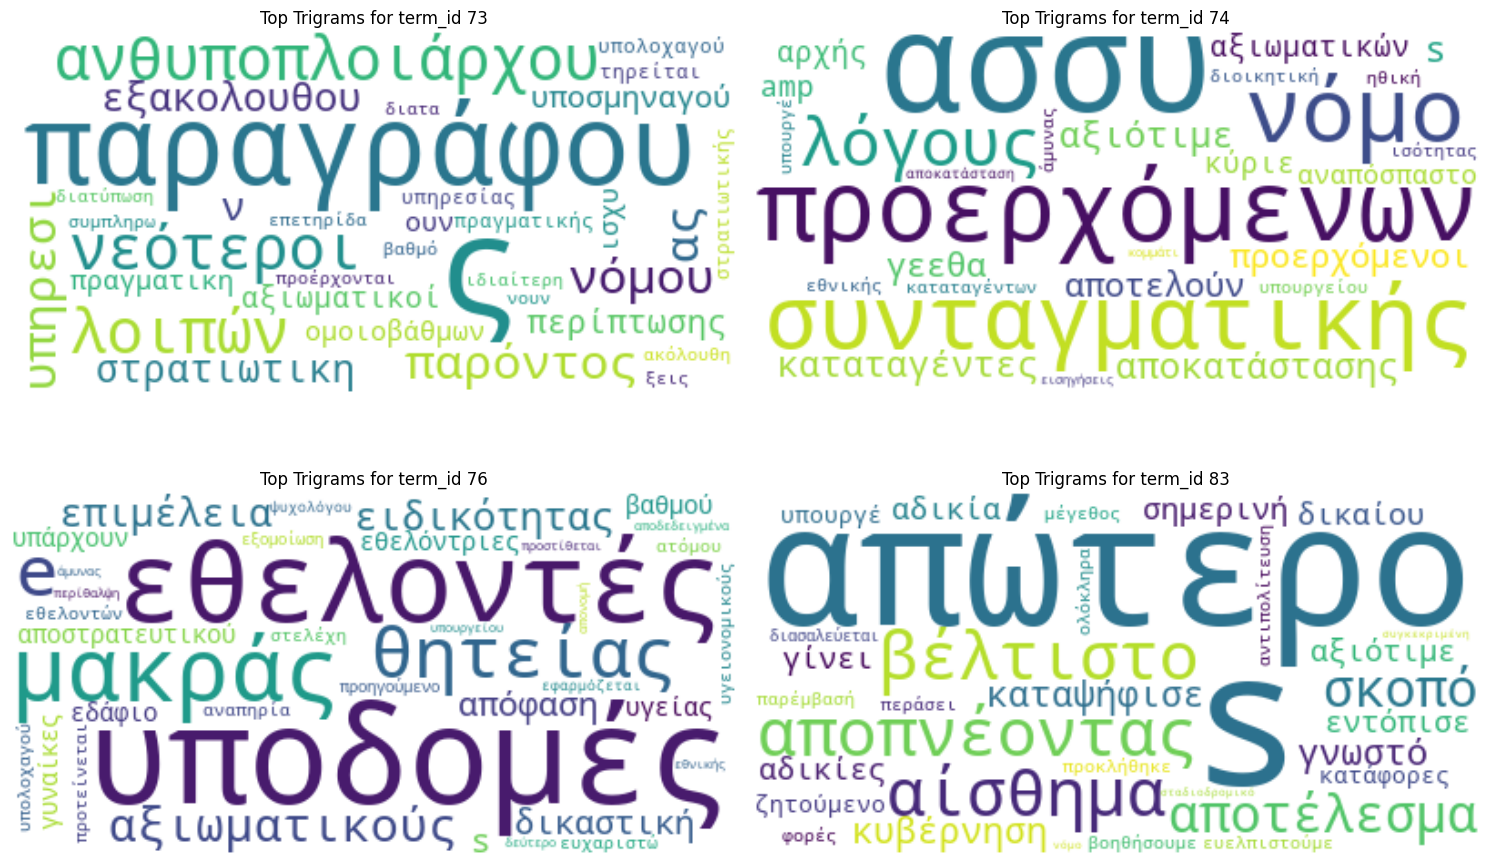

In [83]:
# !pip install wordcloud
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot word clouds for each term
for i, term_id in enumerate(trigram_counters.keys()):
    # Get top 20 trigrams
    top_20_trigrams = trigram_counters[term_id]
    
    # Concatenate trigrams into single strings
    trigram_strings = [' '.join(trigram) for trigram, count in top_20_trigrams]
    
    # Create word cloud
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(' '.join(trigram_strings))
    
    # Determine subplot location
    row = i // 2
    col = i % 2
    
    # Display the word cloud in the appropriate subplot
    axs[row, col].imshow(wordcloud, interpolation='bilinear')
    axs[row, col].set_title(f'Top Trigrams for term_id {term_id}')
    axs[row, col].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

### RESULTS OF DEEPER TECHNIQUES

In our dataset going into deeper techniques, we made some observations:

- Firstly in the plot of pos tagging we can observe punctuation which show us that that either Spacy library cannot remove all the punctuations or our POS-TAGGER transformer misclassifies a lot (however, from the documentation it achieves 98%). So, for the Greek Language we must take these results into consideration.
- Secondly, is very important to comprehend our data structure if we are going to generate text. By understanding the most common tagger, can help us create more coherent and grammatically correct text by ensuring that generated sentences follow similar patterns.
- Thirdly, we observed in n-gram counters that when we deal with a discussion we can extract valuable staff. For example, in trigram counter we observed that they talk a lot about "δικαιοσύνη". So if we want to improve a discussion we might extract these valuable information in order to see how we can direct the discussion.
- In NER task we observed that most common entities were GPE and very few entities about PERSON. However the NER entities were very few, so we can observe that in comments they do not use NER entities.

# CREATE A SUMMARY FOR EACH ARTICLE 

So we are going to create a summary for each article of a term_id by using GPT API (GPT 3.5 turbo 0125). 
We want to check if summary is close to the article's topic and if there are similarities in each article.

We are going to take the articles of a term, use their comments in order to create a summarize. 

In [84]:
my_cols = data_def.columns.to_list()
print(my_cols)

['16181', 'term_id', 'name', 'post_title', 'comment_content', 'word_count', 'has_emoji', 'tok_comments', 'tok_comments_no_stopwords', 'tok_comments_with_stopwords', 'comments_no_stopwords', 'comments_with_stopwords', 'lemmatized_comments_no_stopwords', 'word_count_no_stopwords', 'ner_entities', 'pos_tags_no_stopwords']


In [86]:
data_def.to_csv('data/ministryofdefence_final.csv', index=False)

In [88]:
def extract_comments_for_article(df, column, article):
    df_article = df[df[column] == article] 
    return df_article

# Extract the comments for a random article for term_id=74
df_74 = data_def[data_def['term_id'] == 74]
articles_74 = np.unique(df_74[my_cols[3]])

df_74_01 = extract_comments_for_article(df_74, my_cols[3], articles_74[0])
print(f'Number of comments for article: "{articles_74[0]}" is: {len(df_74_01)}')

Number of comments for article: "Άρθρο 01 - Ειδικές κατηγορίες αξιωματικών Εκτός Οργανικών Θέσεων" is: 123


### AVERAGE WORD LENGTH FOR THE COMMENTS OF ONE ARTICLE FOR TERM_ID:74

['Ρυθμίσεις περί σταδιοδρομίας και εξέλιξης στελεχών και οικονομικής μέριμνας και λογιστικού των Ενόπλων Δυνάμεων']


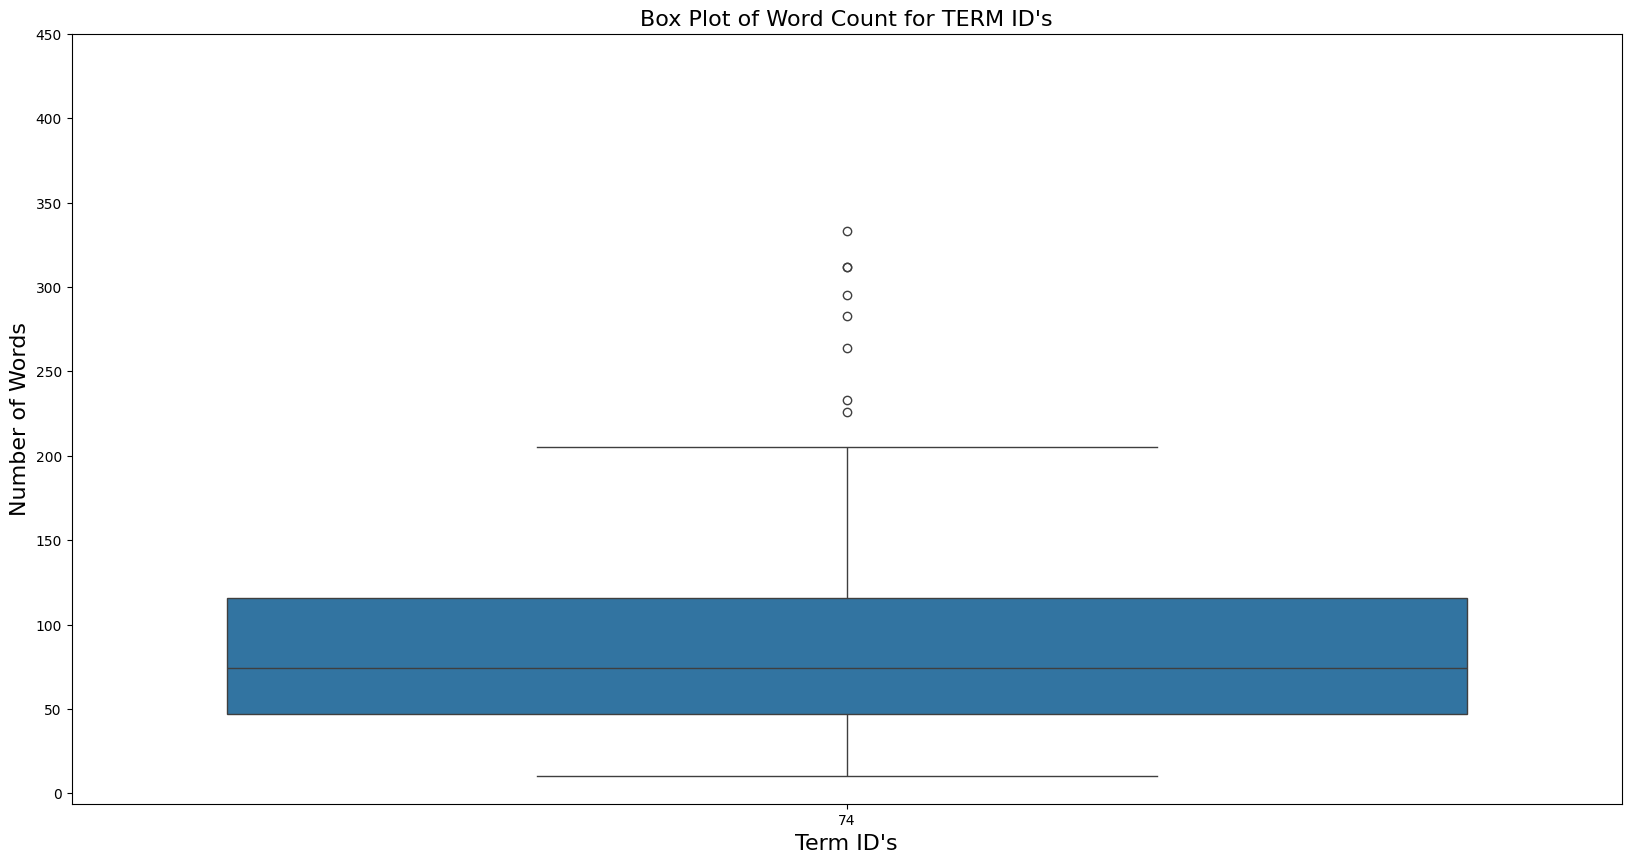

In [89]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1,1,1)
avg_word_length(df_74_01, 'word_count', 74, step_y_axis=50, max_y_position=150)
plt.show()

### NER FOR THE COMMENTS OF ONE ARTICLE FOR TERM_ID:74

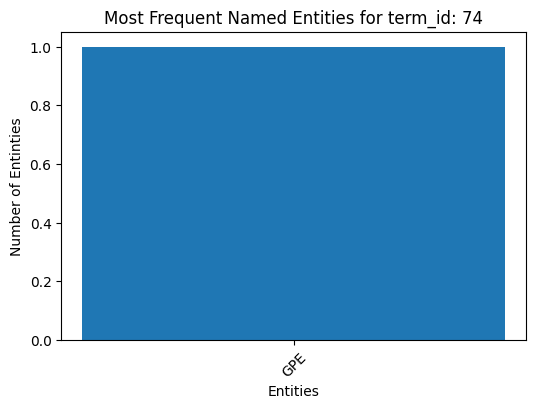

In [90]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1,1,1)
entity_74_01 = calc_ner(df_74_01, 'ner_entities', 74)
plt.show()

### PLOT POS TAGS FOR THE ARTICLE OF TERM_ID:74

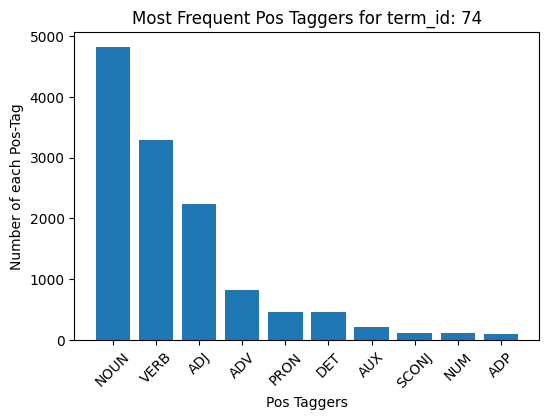

12735


In [91]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1,1,1)
all_tags_74_01 = calc_pos_tags(df_74_01, 'pos_tags_no_stopwords', 74)
plt.show()

print(len(all_tags_74_01))

In [72]:
%%capture
!pip install openai python-dotenv openpyxl
import openai
import os
from dotenv import load_dotenv
import openpyxl

### SEE A SUMMARY EXAMPLE OF AN ARTICLE

In [73]:
class PromptingGPT:

    # Load API key and organization from environment variables
    load_dotenv("secrets.env")
    openai.api_key = os.getenv("OPENAI_API_KEY")
    openai.organization = os.getenv("OPENAI_ORGANIZATION")

    ClientOpenAi = openai.OpenAI(
            api_key= openai.api_key,
            organization= openai.organization
        )

    
    def make_prompts(self, prompt, GPT_model= 'gpt-3.5-turbo-0125'):
        """
        Create a conversation with a GPT model. With
        the following code you create a prompt with a GPT model
        :param prompt: str (input text)
        :param GPT_model: str (model to be selected)
        :return: response of GPT model
        """
        messages = [{'role': 'system', 'content': 'You are a helpful assistant.'}]
        messages.append({'role': 'user', 'content': prompt})

        response = openai.chat.completions.create(
            model=GPT_model,
            messages=messages,
            max_tokens=4000,
        )

        # Extract and print the model's reply
        reply = response.choices[0].message.content
        print(reply)

        # Update conversation history
        return reply

In [79]:
final_cols = df_74_01.columns.to_list()
final_cols
print(df_74_01.iloc[3]['comments_with_stopwords'])

πολύ καλή εξέλιξη για όσους συναδέλφους επιθυμούν να συνεχίσουν και πέραν της 35ετιας να προσφέρουν την εμπειρία τους και τις υπηρεσίες τους στις ε.δ μας δίνεται η δυνατότητα να εργαστούμε στο αντικείμενο που αγαπήσαμε βιώσαμε και αποτελεί το μεγαλύτερο κομμάτι της ζωής μας πάρα ταύτα τα στελέχη των ειδικών δυνάμεων του πολεμικού ναυτικού υ κτ πως θα συνεχίσουν να επιχειρούν και να μεταδίδουν την εμπειρία τους και τις γνώσεις τους χωρίς να καταδύονται ή να πέφτουν με το αλεξίπτωτο κόβοντας αυτό το προνόμιο και το οικονομικό επίδομα πως θα διδάξει καταδύσεις κάποιος χωρίς να καταδυθεί οπωσδήποτε είναι μια πολύ καλή εξέλιξη που δίνει την δυνατότητα σε στελέχη να παραμένουν ενεργά και να αποτελούν παράδειγμα προς μίμηση


In [222]:
length_coms = len(df_74_01)
summary_each_12 = []
for i in tqdm(range(0, length_coms, 12)):
    GPT_prompts = PromptingGPT() # Create a new instance of GPT model in each iteration
    if (length_coms-i)<12:
        comments = df_74_01.iloc[i:length_coms]['comments_no_stopwords'].to_list()
    else:
        comments = df_74_01.iloc[i:i+12]['comments_no_stopwords'].to_list()
    prompt = f"""
    Hello my good model, I would like to create a summary of 300 words for an article and its comments. 
    The article is from the Ministry of Defence and the topic of discussion is: 
    "Ειδικές κατηγορίες αξιωματικών Εκτός Οργανικών Θέσεων". 
    I will provide you the comments and I would like you to create the summary in order the Minister of Defense 
    to be able to comprehend the whole discussion and its most important points. Please I would like the summary
    to be in Greek language as the comments are. Additionaly, I will give you some insights by the exploratory 
    I made for this article. Firstly, the 40% of the article contains nouns, 25% contains verbs and 20% containts adjectives. 
    The average word count for the comments is 95 words. Finally, for each comment I have removed stopwords, so be 
    careful with the connections of the words.
    Please write me an efficient summary with all the insights from the comments. Thank you
    Here are the comments: + {comments}
    """
    summary_each_12.append(GPT_prompts.make_prompts(prompt))        

  9%|█████████████                                                                                                                                  | 1/11 [00:20<03:23, 20.39s/it]

Από τα σχόλια που παρατίθενται, φαίνεται να υπάρχει θετική ανταπόκριση από τους αξιωματικούς Εκτός Οργανικών Θέσεων σχετικά με τις ειδικές κατηγορίες τους. Οι αξιωματικοί επιθυμούν να παραμείνουν ενεργοί μετά την ολοκλήρωση της υπηρεσίας τους και να συνεχίσουν να προσφέρουν την εμπειρία και τις γνώσεις τους στην εθνική υπηρεσία. Επισημαίνεται η ανάγκη για νομοθετικές ρυθμίσεις που θα επιτρέπουν στους αξιωματικούς μεγάλης επαγγελματικής εμπειρίας να παραμένουν ενεργοί μετά τη συνταξιοδότηση τους.

Επίσης, προκύπτει η ανάγκη για αναγνώριση της συνεισφοράς τους μετά από τόσα χρόνια υπηρεσίας, καθώς και για τη ρύθμιση θεμάτων όπως η οικονομική αποζημίωση και το καθεστώς των αποστράτων. Οι αξιωματικοί επισημαίνουν τη σημασία της συνέχισης της εργασίας τους υπέρ της πατρίδας και των νεότερων γενεών.

Συνολικά, οι σχολιαστές εκφράζουν την υποστήριξή τους προς την πρόταση ενίσχυσης των ειδικών κατηγοριών αξιωματικών Εκτός Οργανικών Θέσεων και της σημασίας που έχει η συνέχιση της συνεισφοράς το

 18%|██████████████████████████                                                                                                                     | 2/11 [00:36<02:42, 18.09s/it]

Από τα σχόλια που παραθέτεις, προκύπτουν σημαντικά θέματα σχετικά με τις ειδικές κατηγορίες αξιωματικών Εκτός Οργανικών Θέσεων. Συνολικά, υπάρχει συζήτηση για τον τρόπο με τον οποίο θα διασφαλιστεί η συνέχιση και η εξέλιξη του προσωπικού που υπηρετεί ή έχει υπηρετήσει στον ελληνικό στρατό. Ορισμένοι εκφράζουν ευχαρίστηση για αυτήν την εξέλιξη και ελπίζουν ότι θα γίνει νόμος στο κοντινό μέλλον.

Επίσης, αναφέρεται στη σημασία της πολιτικής ηγεσίας και της συνέχισης της υποστήριξης προς τους εν ενεργεία υπαλλήλους και τα στελέχη που προσφέρουν υπηρεσίες στον ελληνικό λαό. Το προτεινόμενο σχέδιο νόμου αποτελεί προσέγγιση που θα επιτρέψει τη διατήρηση εμπειρικού προσωπικού με αξιόλογες γνώσεις και επαγγελματική εμπειρία.

Τέλος, αναδείχθηκε η σημασία της κατάλληλης διαχείρισης της μείωσης των εκπαιδευτικών θέσεων και των αντίστοιχων εξελίξεων στο προσωπικό του στρατού. Η προώθηση ορθών πολιτικών και τον σεβασμό προς τον εν ενεργεία πληθυσμό φαίνεται ότι αποτελεί προτεραιότητα για την γενικ

 27%|███████████████████████████████████████                                                                                                        | 3/11 [00:56<02:28, 18.60s/it]

Από το άρθρο του Υπουργείου Άμυνας με τίτλο "Ειδικές κατηγορίες αξιωματικών Εκτός Οργανικών Θέσεων", προκύπτει η σημασία του νομοσχεδίου που επιτρέπει σε στελέχη να παραμείνουν στο στρατό από τη στρατολόγησή τους έως την αποστρατεία τους, με κριτήρια πλαίσια οικειοθελούς παραμονής και αξιολόγηση των προσόντων τους. Η διαδικασία αυτή προβλέπει διαφορετικές προθεσμίες και κριτήρια με βάση τις κρίσεις και τις εμπειρίες τους.

Με βάση τα σχόλια των αναγνωστών, παρατηρείται η θετική υποδοχή του νομοσχεδίου για το κράτος, καθώς επιτρέπει την διατήρηση εμπειριών και την ενίσχυση του επαγγελματικού προσανατολισμού των αξιωματικών. Επιπλέον, υπάρχει απόλυτη αποδοχή για την τερματισμό της υποχρεωτικής εφεδρείας μετά τα 35 έτη υπηρεσίας, ενισχύοντας την ικανότητα του στρατεύματος με εμπειρικό και ενεργό προσωπικό.

Συνολικά, η εφαρμογή αυτών των μέτρων αποτελεί θετική εξέλιξη για τον τομέα της Άμυνας, ενισχύοντας την επαγγελματική ανάπτυξη των αξιωματικών και παρέχοντας κοινωνική δικαιοσύνη σε σχ

 36%|████████████████████████████████████████████████████                                                                                           | 4/11 [01:20<02:27, 21.09s/it]

Από τα σχόλια φαίνεται ότι η συζήτηση για τις ειδικές κατηγορίες αξιωματικών εκτός οργανικών θέσεων αφορά κυρίως το θέμα της αδικίας και της ανισότητας στον στρατό. Το προτεινόμενο σχέδιο νόμου θεωρείται ότι αποτελεί θετικό βήμα προς την επίλυση αυτών των θεμάτων. Οι συνταγματάρχες που αποστρατεύονται πρόωρα ή χωρίς δική τους θέληση έχουν αναγνωρίσει την ανάγκη αποκατάστασης της αδικίας. Επίσης, προβάλλεται η ανάγκη για διαφάνεια και αποσαφήνιση των διοικητικών θεμάτων σχετικά με τις ειδικές κατηγορίες αξιωματικών.

Συνολικά, όλοι φαίνεται να συμφωνούν ότι η επίλυση αυτών των θεμάτων απαιτεί δίκαιες και ισότιμες λύσεις, που θα αναγνωρίζουν τη συνολική εμπειρία και προσφορά των αξιωματικών. Επίσης, υποδεικνύεται η ανάγκη για διαφάνεια στις διοικητικές διαδικασίες και την επίλυση των διαφόρων ανισοτήτων που παρατηρούνται. Τέλος, η διαφάνεια και η σαφήνεια στην εφαρμογή των νέων μέτρων αποτελούν σημαντικές προτεραιότητες για την εξισορρόπηση του συστήματος.

Με βάση τα παραπάνω, οφείλει ο

 45%|█████████████████████████████████████████████████████████████████                                                                              | 5/11 [01:40<02:03, 20.56s/it]

Από τα σχόλια προκύπτουν κάποια κύρια σημεία που έχουν επισημανθεί στο άρθρο του Υπουργείου Άμυνας για τις "Ειδικές κατηγορίες αξιωματικών Εκτός Οργανικών Θέσεων". Το σχέδιο νόμου προβλέπει τη δυνατότητα επαναφοράς υπαξιωματικών που έχουν συνταξιοδοτηθεί πρόωρα, με στόχο την ενίσχυση της εθνικής άμυνας και την αντιμετώπιση κοινωνικών αδικιών. Υπογραμμίζεται η ανάγκη για δικαιοσύνη και ισότιμη μεταχείριση των αξιωματικών σε όλες τις κατηγορίες. Επίσης, επισημαίνεται η σημασία της προσφοράς των στελεχών που επιθυμούν να συνεχίσουν τις υπηρεσίες τους μετά την ηλικία της συνταξιοδότησης. Τέλος, υπογραμμίζεται η ανάγκη για οικονομική και κοινωνική ισονομία στον τομέα της επαγγελματικής κατάρτισης και απασχόλησης στις ένοπλες δυνάμεις. Συνολικά, το νομοσχέδιο φαίνεται να συνδυάζει την ανάγκη ενίσχυσης της εθνικής άμυνας με την αντιμετώπιση κοινωνικών ανισοτήτων, προσφέροντας λύσεις που εξυπηρετούν το συνολικό καλό των Ενόπλων Δυνάμεων. Η διακρατική απόψιμία καθιστά το σχέδιο νόμου σημαντικό 

 55%|██████████████████████████████████████████████████████████████████████████████                                                                 | 6/11 [01:58<01:38, 19.72s/it]

Το άρθρο από το Υπουργείο Άμυνας με τίτλο "Ειδικές κατηγορίες αξιωματικών Εκτός Οργανικών Θέσεων" περιλαμβάνει συζητήσεις για την προώθηση εξαιρετικών περιπτώσεων αξιωματικών εκτός του καθιερωμένου συστήματος. Από τα σχόλια των αναγνωστών φαίνεται ότι επικρατεί ικανοποίηση για την εξέλιξη και την πρόταση νόμου, με έμφαση στην παροχή ευκαιριών σε προσωπικό με μεγάλη υπηρεσιακή εμπειρία. Το προτεινόμενο νομοσχέδιο φέρνει αλλαγές στο σύστημα υπηρεσιών και αναγνωρίζει τη σημασία της εμπειρίας και της συνεισφοράς των αξιωματικών. Η ανάλυση των σχολίων αποκαλύπτει επίσης το ενδιαφέρον για τη διαδικασία συνταξιοδότησης και την ανάγκη να ρυθμιστούν θέματα καθημερινότητας. Με γενικές γραμμές, οι αναγνώστες υποστηρίζουν την πρόταση και εκφράζουν την προσδοκία για μια βελτιωμένη διοικητική διαδικασία στον τομέα των ειδικών κατηγοριών αξιωματικών. Ο μέσος όρος λέξεων για τα σχόλια είναι 95 λέξεις, ενώ παρατηρείται συχνή χρήση ουσιαστικών (40%), ρημάτων (25%) και επιθέτων (20%).


 64%|███████████████████████████████████████████████████████████████████████████████████████████                                                    | 7/11 [02:12<01:11, 17.77s/it]

Το Υπουργείο Άμυνας συζητά το θέμα των Ειδικών Κατηγοριών Αξιωματικών Εκτός Οργανικών Θέσεων, με τα εξής σημαντικά στοιχεία να προκύπτουν από τα σχόλια των αναγνωστών. Το προτεινόμενο νομοσχέδιο επιδιώκει τη δικαιοσύνη και την εξέλιξη των στελεχών, επιτρέποντάς τους να συνεχίσουν την υπηρεσία τους πέραν των 35 ετών με βάση την εμπειρία τους. Η απόφαση του Υπουργού Εθνικής Άμυνας βασίζεται σε ισότιμους λόγους και επιδιώκει να διευκολύνει την υπηρεσία σε περιοχές που χρειάζονται ενίσχυση. Οι αξιωματικοί εκφράζουν τη στήριξή τους προς το σχέδιο, καθώς θα ενισχύσει την αξιοπιστία του συστήματος και θα προωθήσει την αξιοκρατία. Επίσης, υπογραμμίζουν τη σημασία της ομαλότητας και της βελτίωσης του εργασιακού περιβάλλοντος. Το νομοσχέδιο ανταποκρίνεται στις ανάγκες του προσωπικού και αναμένεται να οδηγήσει σε θετικά αποτελέσματα για τις Ενόπλες Δυνάμεις.


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/11 [02:26<00:49, 16.55s/it]

Η συζήτηση που διεξήχθη στο άρθρο του Υπουργείου Άμυνας με θέμα "Ειδικές κατηγορίες αξιωματικών Εκτός Οργανικών Θέσεων" εστίασε σε διάφορα σημαντικά θέματα. Το νομοσχέδιο προκάλεσε διαφορετικές αντιδράσεις, με τους συνταξιούχους αξιωματικούς να εκφράζουν ανησυχίες για την ισότητα και τις συνέπειές του. Παράλληλα, υπήρξε έμφαση στην ανάγκη για εργασιακές ευκαιρίες και εκμετάλλευση εμπειρίας στελεχών. Σημαντικός παράγοντας ήταν και η ανάγκη νέων στελεχών σε ορισμένες ειδικότητες, προκειμένου να καλυφθούν ελλείψεις. Ακόμα, προέκυψε η ανάγκη για δίκαιη μεταχείριση των αξιωματικών από τη στιγμή της αποστρατείας τους. Το νόμοσχέδιο προβλέπει την παροχή δυνατότητας σε στελέχη να επιστρέψουν στην ενεργό υπηρεσία, ενώ παράλληλα υπογραμμίζεται η σημασία της συνεχιζόμενης εκπαίδευσης και αξιοποίησης εμπειριών. Συνολικά, η πρόταση του νόμου φέρνει θετικές προοπτικές για τον τομέα της άμυνας και της ασφάλειας.


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 9/11 [02:44<00:34, 17.05s/it]

**Περίληψη Άρθρου και Σχολίων για τις 'Ειδικές Κατηγορίες Αξιωματικών Εκτός Οργανικών Θέσεων'**

Το άρθρο αναλύει την προοπτική για την παραμονή εξειδικευμένων αξιωματικών εκτός οργανικών θέσεων, παρέχοντας τους απαραίτητα κίνητρα και επιδόματα, ώστε να διατηρηθεί η απαραίτητη εμπειρία σε κρίσιμους τομείς.

Από τα σχόλια προκύπτει η υποστήριξη για την πολιτική του Υπουργείου Άμυνας, αναφέροντας τα οφέλη της παραμονής των στελεχών εκτός οργανικών θέσεων, τη σημασία της διασφάλισης δικαιοσύνης στις συντάξεις και την ανάγκη για ισότιμη μεταχείριση σε θέματα προαγωγών και αποστρατεύσεων.

Επιπρόσθετα, σημαντικοί λόγοι για να διατηρηθεί αυτή η πολιτική αφορούν την ασφάλεια, την επαγγελματική εξειδίκευση και την αποφυγή κοινωνικής αδικίας.

Συνολικά, η πρόταση ενισχύει τη θέση των εξειδικευμένων αξιωματικών, δίνοντας έμφαση στη διαφύλαξη της εμπειρίας και τη συνέχιση της υπηρεσίας τους με δικαιοσύνη και ανταμοιβή.

---
*Με βάση την ανάλυση των σχολίων που προσφέρατε, η περίληψη αυτή επικεντρ

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 10/11 [03:08<00:19, 19.12s/it]

Από το άρθρο του Υπουργείου Άμυνας με θέμα "Ειδικές κατηγορίες αξιωματικών Εκτός Οργανικών Θέσεων" και τα σχόλια που παρατίθενται, προκύπτουν σημαντικά θέματα και προτάσεις που αξίζει ο Υπουργός να λάβει υπόψη. Αρχικά, αναφέρεται ότι ένα μεγάλο ποσοστό του άρθρου περιέχει ουσιαστικές ονομαστικές εκφράσεις, ενώ επίσης αναφέρεται σημαντικό ποσοστό ρημάτων και επίθετων. Τα σχόλια αγγίζουν θέματα δικαιοσύνης, ισότητας και αποζημίωσης των αξιωματικών που αποστρατεύονται πρόωρα.

Οι πολίτες εκφράζουν ανησυχίες για τη διαφορετική μεταχείριση που υπάρχει όσον αφορά την αποζημίωση των αξιωματικών και παρουσιάζουν προτάσεις για βελτιώσεις στο νόμο. Επικροτούνται πρωτοβουλίες που ενισχύουν την επαγγελματική εξέλιξη των αξιωματικών, παρέχοντας τους τη δυνατότητα να συνεχίσουν την υπηρεσία τους.

Σημαντικό είναι επίσης το θέμα της αναδιάρθρωσης του στρατού και η ανάγκη για δίκαιη μεταχείριση των αποστρατευομένων. Η πρόταση νόμου που παρουσιάζεται απαιτεί λεπτομερή εξέταση και προσαρμογές για την απ

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [03:28<00:00, 18.99s/it]

Τα σχόλια που συνοδεύουν το άρθρο αναφέρονται σε συγκεκριμένα θέματα που σχετίζονται με τις ειδικές κατηγορίες αξιωματικών εκτός οργανικών θέσεων. Μια από τις βασικές προτάσεις που υπάρχει είναι η παράταση του εργασιακού βίου για τους αξιωματικούς που έχουν υπηρετήσει για μεγάλο χρονικό διάστημα. Ένα θετικό στοιχείο του προτεινόμενου νόμου είναι η δυνατότητα για αυτοπαγίευση και αποστράτευση ευδόκιμα τερματίζοντας την υπηρεσία τους μετά από 35 χρόνια. Επίσης, υπάρχει και η επιθυμία για περισσότερη ευελιξία στην παραμονή ενεργών στελεχών, που θα εξυπηρετήσει τη διατήρηση της αξιόμαχης δύναμης της χώρας μας σε δύσκολους καιρούς. Επιπλέον, αναγνωρίζεται η αναγκαιότητα για πρόβλεψη και προστασία των στελεχών δυνάμεων, ενισχύοντας την ηθική και αξιοπρέπεια στην υπηρεσία. Συνολικά, η προτεινόμενη ρύθμιση φαίνεται να βελτιώνει τις συνθήκες εργασίας και αποστρατεύσεων των αξιωματικών, ενισχύοντας τους παράγοντες ασφάλειας και αξιοπιστίας των ελληνικών δυνάμεων.


### CREATE A SUMMARY FOR ALL THE COMMENTS

For the final summarization we are going to use GPT-4 turbo in order to improve our results

In [224]:
GPT_prompts = PromptingGPT()

prompt = f"""
Hello my good model, I would like to create a summary of 600 words about comments for an article by Ministry of Defence.
The article is about Ministry of Defence and the topic of discussion is: "Ειδικές κατηγορίες αξιωματικών Εκτός Οργανικών Θέσεων".
The comments scope to represent the problems, aggrements and/or challenges for the article. However, for the reason that the comments
were too many, I created a summary for each 15 comments of 200 words. So, I would like you to create a final summary 
of 600 words, based on the summaries of the comments. Please write the final summary based on the summaries I am providing you
and the topic. I would like the final summary to be in Greek language as the summaries are.
Here are the summaries: + {summary_each_12}
"""

final_summary_74_01 = GPT_prompts.make_prompts(prompt, GPT_model='gpt-4-0125-preview')

Η συζήτηση που έχει προκύψει σχετικά με την πολιτική για τις Ειδικές Κατηγορίες Αξιωματικών Εκτός Οργανικών Θέσεων, όπως αναλύεται από το Υπουργείο Άμυνας και τις αντιδράσεις των αναγνωστών, έχει αναδείξει μια σειρά θετικών προοπτικών και προκλήσεων για το μέλλον των Ενόπλων Δυνάμεων στην Ελλάδα. Αξιωματικοί και πολίτες συμφωνούν εν γένει στην ανάγκη για ενίσχυση της εθνικής ασφάλειας μέσω της αξιοποίησης της πολύτιμης εμπειρίας και γνώσης των αξιωματικών που βρίσκονται εκτός των οργανικών θέσεων. 

Επισημαίνεται η σημασία νομοθετικών ρυθμίσεων που θα επιτρέπουν στα εν λόγω στελέχη να παραμείνουν ενεργά και μετά την καθιερωμένη ηλικία συνταξιοδότησης, προσφέροντας την εμπειρία και τις γνώσεις τους στον τομέα της άμυνας. Αυτό αντικατοπτρίζεται τόσο στην ανάγκη για αναγνώριση της συνεισφοράς τους όσο και στη διασφάλιση της οικονομικής και κοινωνικής τους προστασίας. Η διατήρηση και αξιοποίηση της εμπειρίας τους μέσω ενός οργανωμένου συστήματος περιγράφεται ως επιτακτική ανάγκη για την εν

### CLASSIFY THE COMMENTS INTO SENTIMENT LABELS
The labels are
- positive
- negative
- generally agree but have some proposals for amendments
- generally disagree with the whole philosophy of the intervention

In [268]:
length_coms = len(df_74_01)
labels = []
for i in tqdm(range(0, length_coms, 12)):
    GPT_prompts = PromptingGPT() # Create a new instance of GPT model in each iteration
    if (length_coms-i)<12:
        comments = df_74_01.iloc[i:length_coms]['comments_with_stopwords'].to_list()
    else:
        comments = df_74_01.iloc[i:i+12]['comments_with_stopwords'].to_list()
    comments = [f'comment {i+1}: {comment}' for i, comment in enumerate(comments)]  
    prompt = f"""
    Hello my good model, I would like to classify the following comments based on their sentiment.
    The comments were made on the article "Ειδικές κατηγορίες αξιωματικών Εκτός Οργανικών Θέσεων", 
    of the Ministry of National Defence (Greece).
    The labels I would like you to classify the comments are:
    - positive (use label 0)
    - negative (use label 1)
    - generally agree but have some proposals for amendments (use label 2)
    - generally disagree with the whole philosophy of the intervention (use label 3)
    Please take into account that this is a single label Clasification task.
    Please in the response give me only the labels in a list. 
    For example, a response for the task I want you to implement is:
    "[0, 2, 3, 1, 0, 1, 1]" without any other explanation
    Here are the comments for the classification task: + {comments}
    """
    labels.append(GPT_prompts.make_prompts(prompt))  

  9%|█████████████                                                                                                                                  | 1/11 [00:01<00:14,  1.47s/it]

[0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0]


 18%|██████████████████████████                                                                                                                     | 2/11 [00:02<00:12,  1.42s/it]

[1, 0, 0, 0, 3, 3, 1, 1, 2, 2, 0, 1]


 27%|███████████████████████████████████████                                                                                                        | 3/11 [00:04<00:11,  1.49s/it]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


 36%|████████████████████████████████████████████████████                                                                                           | 4/11 [00:06<00:11,  1.63s/it]

[0, 0, 2, 3, 1, 2, 2, 2, 2, 2, 3, 0]


 45%|█████████████████████████████████████████████████████████████████                                                                              | 5/11 [00:07<00:08,  1.49s/it]

[3, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2]


 55%|██████████████████████████████████████████████████████████████████████████████                                                                 | 6/11 [00:09<00:08,  1.77s/it]

[0, 2, 1, 3, 1, 0, 0, 2, 0, 1, 0, 2]


 64%|███████████████████████████████████████████████████████████████████████████████████████████                                                    | 7/11 [00:11<00:06,  1.72s/it]

[0, 2, 2, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0]


 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 8/11 [00:13<00:05,  1.70s/it]

[0, 2, 3, 0, 1, 1, 2, 0, 0, 2, 1, 0]


 82%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 9/11 [00:14<00:03,  1.69s/it]

[0, 2, 3, 2, 0, 0, 1, 2, 0, 0, 2, 2]


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 10/11 [00:17<00:01,  1.93s/it]

[0, 0, 0, 1, 3, 3, 2, 1, 3, 0, 2, 1]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:17<00:00,  1.63s/it]

[3, 0, 0]


In [269]:
# Flatten the list
flattened_labels = [int(label.strip('[]"')) for sublist in labels for label in sublist.strip('[]').split(', ')]

In [270]:
print(len(flattened_labels))

123


### LETS TRY WITH THE NEGATIVE COMMENTS

In [273]:
negative_comments = []
for i, label in enumerate(flattened_labels):
    if label == 1:
      negative_comments.append(df_74_01.iloc[i]['comments_with_stopwords'])

print(f"The negative comments by the GPT Classifier are: {len(negative_comments)}")

The negative comments by the GPT Classifier are: 19


### CREATE A SUMMARY FOR THE NEGATIVE COMMENTS

In [277]:
GPT_prompts = PromptingGPT() # Create a new instance of GPT model in each iteration  
prompt = f"""
Hello my good model, I would like to create a summary of 500 words about comments for an article by Ministry of Defence.
The article is about Ministry of Defence and the topic of discussion is: "Ειδικές κατηγορίες αξιωματικών Εκτός Οργανικών Θέσεων".
The comments I have collected, have been classified by GPT model as the negative comments for that article.
So, create a summary in order the Minister of Defence to be able to comprehend the most important points of these comments.
I would like the summary to be in Greek language as the comments are.
Here are the negative comments for the classification task: + {negative_comments}
"""
summary_for_negative = labels.append(GPT_prompts.make_prompts(prompt, GPT_model='gpt-4-0125-preview')) 

Το σχέδιο νόμου που συζητείται διεγείρει τις αντιδράσεις των ενδιαφερομένων που αναζητούν τη δικαιοσύνη και την ισονομία εντός των Ενόπλων Δυνάμεων. Οι σχολιασμοί φαίνεται να συσσωρεύονται κυρίως γύρω από την ηλικία συνταξιοδότησης, τη δικαιοσύνη στην αναγνώριση της υπηρεσίας και την ανάγκη για δικαιότερη μεταχείριση των αξιωματικών που επιθυμούν να παραμείνουν ενεργοί μετά τη συμπλήρωση ορισμένου χρόνου υπηρεσίας.

Ειδικότερα, αναφέρεται η ανησυχία για την πρόωρη συνταξιοδότηση αξιωματικών σε ηλικία 53 ετών, όταν άλλοι εργαζόμενοι παραμένουν ενεργοί έως και τα 67 έτη, θεωρώντας αυτό μια αδικία και μια ανισότητα προς τον γενικό πληθυσμό. Συγχρόνως, εκφράζεται ανησυχία για το γεγονός ότι αυτό σημαίνει πλήρη σύνταξη σε τόσο νεαρή ηλικία, ενώ υπάρχει επίσης μια έντονα εκδηλωθείσα επιθυμία για διαγραφή προβλέψεων που εμποδίζουν στελέχη από την υπηρεσία στο εξωτερικό, θεωρώντας την υποχρησιμοποίηση της εμπειρίας τους ως απώλεια για την υπηρεσία και τη χώρα.

Αναδεικνύεται επίσης μια παράμετ